In [3]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root

x = sp.symbols('x')

M_p = 1
b = 2.3e-5

# Definimos el potencial en función de las variables del problema, con x=phi. Lo hago de forma simbólica para luego calcular las derivadas

def potencial(x,kappa,lambda_0,xi):

    return (lambda_0+b*(sp.log((sp.sqrt(xi)/kappa/M_p)*((M_p/sp.sqrt(xi))*sp.sqrt(1-sp.exp(-(sp.sqrt(2/3)/M_p)*x)))))**2)*(((M_p/sp.sqrt(xi))*sp.sqrt(1-sp.exp(-(sp.sqrt(2/3)/M_p)*x)))**4)/4

# Esta función y las siguientes son para calcular phi=phi(N) en función de los parámetros del problema y phi(N=0)
# Lo hago de esta forma y no con la expresión simbólica anterior porque no consigo que funcione bien con odeint

def evol_phi(phi,N,kappa,lambda_0,xi):
    
    derivada_1 = sp.diff(potencial(x,kappa,lambda_0,xi),x)
    
    V=potencial(phi[0],kappa,lambda_0,xi)
    Vd=derivada_1.evalf(subs={x: phi[0]})
    
    return sp.sqrt((M_p*Vd/V)**2)

def all_parameters(phi_0,kappa,xi,lambda_0):
    
    if phi_0<0:
        phi_0=-phi_0
        
    if xi<0:
        xi=-xi
        
    if lambda_0<0:
        lambda_0=-lambda_0
    
    derivada_1 = sp.diff(potencial(x,kappa,lambda_0,xi),x)
    derivada_2 = sp.diff(derivada_1,x)
    
    N=np.linspace(0,60,1000)
    
    #Calculo phi(N)
    
    phi_N=odeint(evol_phi,phi_0,N,args=(kappa,lambda_0,xi))
    #plt.plot(N,phi_N)
    #plt.title("Campo phi en función de N")
    #plt.show()
    
    phi_f=phi_N[-1]
    phi_60=phi_f[0]
    
    V_0=potencial(phi_0,kappa,lambda_0,xi)
    Vd_0=derivada_1.evalf(subs={x: phi_0})
    Vdd_0=derivada_2.evalf(subs={x: phi_0})
    
    V_60=potencial(phi_60,kappa,lambda_0,xi)
    Vd_60=derivada_1.evalf(subs={x: phi_60})
    Vdd_60=derivada_2.evalf(subs={x: phi_60})
    
    eps_v_0=((M_p*Vd_0/V_0)**2)/2
    eta_v_0=M_p**2*Vdd_0/V_0
    eps_0=eps_v_0
    eta_0=4*eps_v_0-2*eta_v_0
    
    eps_v_60=((M_p*Vd_60/V_60)**2)/2
    eta_v_60=M_p**2*Vdd_60/V_60
    eps_60=eps_v_60
    eta_60=4*eps_v_60-2*eta_v_60
    
    P_r=sp.log(V_60/24/sp.pi**2/eps_60/M_p**4*10**10)
    n_s=1-eta_60-2*eps_60
    r=16*eps_60
    
    print("El valor de n_s es ",n_s)
    print("El valor de r es ", r)
    print("La normalización de P_r es", P_r.evalf())
    print("El valor de eps(0) es ", eps_0)
    
    return [eps_0,n_s,r,P_r]

def fit_phi_0_try(phi_0,kappa,xi,lambda_0):
    
    if phi_0<0:
        phi_0=-phi_0
    
    derivada_1 = sp.diff(potencial(x,kappa,lambda_0,xi),x)
    
    V_0=potencial(phi_0[0],kappa,lambda_0,xi)
    Vd_0=derivada_1.evalf(subs={x: phi_0[0]}) 
    #print("Nueva iteración para phi_0: ",1-((M_p*Vd_0/V_0)**2)/2, phi_0[0])
    
    return 1-((M_p*Vd_0/V_0)**2)/2

def correct_phi_0_try(kappa,xi,lambda_0):
    
    x_0=0.4 #parámetro inicial de iteración
    
    phi_0=fsolve(fit_phi_0_try,x_0,args=(kappa,xi,lambda_0))
    
    return phi_0[0]

def fit(x_fit,kappa,xi):
    
    lambda_0=x_fit[0]
    
    phi_0=correct_phi_0_try(kappa,xi,lambda_0)
    
    if xi<0:
        xi=-xi
        
    if lambda_0<0:
        lambda_0=-lambda_0
        
    if phi_0<0:
        phi_0=-phi_0
    
    #Expresión de las derivadas del potencial pero sin evaluar en phi todavía
    
    derivada_1 = sp.diff(potencial(x,kappa,lambda_0,xi),x)
    derivada_2 = sp.diff(derivada_1,x)
    
    N=np.linspace(0,60,500)
    
    #Calculo phi(N)
    
    phi_N=odeint(evol_phi,phi_0,N,args=(kappa,lambda_0,xi))
    #plt.plot(phi_N)
    
    phi_f=phi_N[-1]
    phi_60=phi_f[0]
    
    #Obtengo los parámetros del sistema (potencial, eps y eta) para phi(N=0) (_0) y phi(N=60) (_60)
    
    V_0=potencial(phi_0,kappa,lambda_0,xi)
    Vd_0=derivada_1.evalf(subs={x: phi_0})
    Vdd_0=derivada_2.evalf(subs={x: phi_0})
    
    V_60=potencial(phi_60,kappa,lambda_0,xi)
    Vd_60=derivada_1.evalf(subs={x: phi_60})
    Vdd_60=derivada_2.evalf(subs={x: phi_60})
    
    eps_v_0=((M_p*Vd_0/V_0)**2)/2
    eta_v_0=M_p**2*Vdd_0/V_0
    eps_0=eps_v_0
    eta_0=4*eps_v_0-2*eta_v_0
    
    eps_v_60=((M_p*Vd_60/V_60)**2)/2
    eta_v_60=M_p**2*Vdd_60/V_60
    eps_60=eps_v_60
    eta_60=4*eps_v_60-2*eta_v_60
    
    #Para ir viendo como va la iteración
    print('Epsilon: ',eps_0,', n_s: ',1-eta_60-2*eps_60,', P_r:',sp.log(V_60/24/sp.pi**2/eps_60/M_p**4*10**10).evalf())
    #print("Phi_0: ",phi_0,", xi: ",xi,", lambda_0: ",lambda_0)
    
    #Tiene esta estructura porque fsolve resuelve numéricamente la ecuación f(x)=0
    #En orden: n_s=0.986 (en N=60), fijación del power spectrum (en N=60)
    return 3.094-sp.log(V_60/24/sp.pi**2/eps_60/M_p**4*10**10)

def power_spectrum_60(phi_0,kappa,xi,lambda_0):
    
    if xi<0:
        xi=-xi
        
    if lambda_0<0:
        lambda_0=-lambda_0
        
    if phi_0<0:
        phi_0=-phi_0
    
    derivada_1 = sp.diff(potencial(x,kappa,lambda_0,xi),x)
    
    N=np.linspace(0,60,1000)
    
    phi_N=odeint(evol_phi,phi_0,N,args=(kappa,lambda_0,xi))

    P_r=[]
    
    for i in range(len(N)):
        value=phi_N[len(N)-i-1]
        V=potencial(value[0],kappa,lambda_0,xi)
        Vd=derivada_1.evalf(subs={x: value[0]})
        eps=((M_p*Vd/V)**2)/2
        P_r.append((V/24/sp.pi**2/eps/M_p**4).evalf())
        
    N_plot=np.linspace(60,0,1000)
    
    plt.plot(N_plot,P_r)
    plt.title("Power Spectrum en función de N")
    plt.yscale("log")
    plt.show()
        
    return P_r

def plot_pot(phi_0,kappa,xi,lambda_0):
    
    if xi<0:
        xi=-xi
        
    if lambda_0<0:
        lambda_0=-lambda_0
        
    if phi_0<0:
        phi_0=-phi_0
    
    derivada_1 = sp.diff(potencial(x,kappa,lambda_0,xi),x)
    
    N=np.linspace(0,60,1000)
    
    phi_N=odeint(evol_phi,phi_0,N,args=(kappa,lambda_0,xi))
    plt.plot(N,phi_N)
    plt.title("Campo en función de N")
    plt.show()

    Pot_plot=[]
    
    for i in range(len(N)):
        value=phi_N[i]
        V=potencial(value[0],kappa,lambda_0,xi)

        Pot_plot.append(V.evalf())
        
    plt.plot(phi_N,Pot_plot)
    plt.title("Potencial en función del campo")
    plt.show()
        
    return Pot_plot

In [4]:
kappa=1.01
lambda_0_0=b/16/0.9
xi=10
x_0=lambda_0_0

solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi))

lambda_0=solutions.x[0]

phi_0=correct_phi_0_try(kappa,xi,lambda_0)

para=all_parameters(phi_0,kappa,xi,lambda_0)
# Pot_plot_1=plot_pot(phi_0,kappa,xi,lambda_0)
print("Phi_0: ",phi_0,", Kappa: ",kappa,", xi: ",xi)
print("Lambda_0: ",lambda_0,", b/16/kappa: ",b/16/kappa)
# P_r_1_60=power_spectrum_60(phi_0,kappa,xi,lambda_0)

Epsilon:  1.00000000000000 , n_s:  0.955301005025351 , P_r: 5.97855042349834
Epsilon:  1.00000000000000 , n_s:  0.955301005025351 , P_r: 5.97855042349834
Epsilon:  1.00000000000000 , n_s:  0.955301005025351 , P_r: 5.97855042349834
Epsilon:  1.00000000000000 , n_s:  0.955301006419399 , P_r: 5.97855050987061
Epsilon:  1.00000000000000 , n_s:  1.27048064548183 , P_r: 12.8337851218463
Epsilon:  0.999999999999932 , n_s:  0.946448012921911 , P_r: 5.51107799123968
Epsilon:  0.999999999999932 , n_s:  0.946448017851731 , P_r: 5.51107822101646
Epsilon:  1.00000000000000 , n_s:  0.907627987346055 , P_r: 3.77906383365635
Epsilon:  1.00000000000000 , n_s:  0.907627993573740 , P_r: 3.77906597523571
Epsilon:  1.00000000000000 , n_s:  1.00250724029765 , P_r: 3.13329971734868
Epsilon:  1.00000000000000 , n_s:  1.00250612933042 , P_r: 3.13329958925961
Epsilon:  1.00000000000000 , n_s:  0.907580858283831 , P_r: 3.74761952510427
El valor de n_s es  1.00250723887886
El valor de r es  0.0877534292705367
La 

In [5]:
kappa=1.1
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.9
x_0=lambda_0_0

n_s_plot_1_1=[]
r_plot_1_1=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_1.append(para[1])
    r_plot_1_1.append(para[2])

n_s_plot_1_1_plot=n_s_plot_1_1[33:]
r_plot_1_1_plot=r_plot_1_1[33:]

n_s_plot_1_1_plot.insert(0,n_s_plot_1_1[33]+0.005)
r_plot_1_1_plot.insert(0,r_plot_1_1[33]+0.00001)

Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 5.94816022641593
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 5.94816022641593
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 5.94816022641593
Epsilon:  1.00000000000000 , n_s:  0.974194347881849 , P_r: 5.94816028972402
Epsilon:  1.00000000000000 , n_s:  1.09783609976917 , P_r: 4.09135926440788
Epsilon:  1.00000000000000 , n_s:  1.09783602119481 , P_r: 4.09136085373646
Epsilon:  1.00000000000000 , n_s:  -1.52146754751313 , P_r: 15.9492812837254
Epsilon:  1.00000000000000 , n_s:  1.15599945328040 , P_r: 3.13889485618733
Epsilon:  1.00000000000000 , n_s:  1.15600161285135 , P_r: 3.13886532969772
Epsilon:  0.999999999999999 , n_s:  1.15615412783124 , P_r: 3.13681044748808
El valor de n_s es  1.15781551118553
El valor de r es  0.0601233334482312
La normalización de P_r es 3.11417431634611
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.974194352458678 , P_r: 5.7741374724366

Epsilon:  1.00000000000000 , n_s:  0.974194347881848 , P_r: 4.96320731952847
Epsilon:  1.00000000000004 , n_s:  1.18794236115597 , P_r: 2.28207869329118
Epsilon:  1.00000000000004 , n_s:  1.18794236133321 , P_r: 2.28207838865820
Epsilon:  1.00000000000002 , n_s:  1.18944070308837 , P_r: 2.35210277005029
Epsilon:  1.00000000000002 , n_s:  1.18944071935952 , P_r: 2.35210233405645
Epsilon:  1.00000000000001 , n_s:  -0.617351622119305 , P_r: 10.6696341374114
Epsilon:  1.00000000000002 , n_s:  1.19105609242881 , P_r: 2.31227326165682
Epsilon:  1.00000000000002 , n_s:  1.19007617514071 , P_r: 2.33647997823132
Epsilon:  1.00000000000002 , n_s:  1.18956056242578 , P_r: 2.34940719389499
El valor de n_s es  1.18939219229658
El valor de r es  0.0688598517402805
La normalización de P_r es 2.35338166761008
El valor de eps(0) es  1.00000000000002
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 4.85507281367978
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 4.85507281367978
E

Epsilon:  1.00000000000000 , n_s:  0.974194347881849 , P_r: 4.30619918558437
Epsilon:  1.00000000000000 , n_s:  0.161722189265825 , P_r: 32.9432518439785
Epsilon:  1.00000000000000 , n_s:  0.990068653907736 , P_r: 4.24132612245539
Epsilon:  1.00000000000000 , n_s:  0.990068640531673 , P_r: 4.24132609672757
Epsilon:  1.00000000000000 , n_s:  0.974573627166707 , P_r: 4.30110641368164
Epsilon:  1.00000000000000 , n_s:  0.984954248454788 , P_r: 4.23890862195207
Epsilon:  1.00000000000000 , n_s:  0.984954237931151 , P_r: 4.23890863369807
Epsilon:  1.00000000000000 , n_s:  0.987373350144112 , P_r: 4.23811767743779
Epsilon:  1.00000000000000 , n_s:  0.987373338264817 , P_r: 4.23811767238633
Epsilon:  1.00000000000000 , n_s:  0.984951386149054 , P_r: 4.23891181952462
El valor de n_s es  0.987373350148940
El valor de r es  0.00788346979432375
La normalización de P_r es 4.23811767738934
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 4.22775769

Epsilon:  1.00000000000000 , n_s:  0.983568080466471 , P_r: 3.74741554715967
Epsilon:  1.00000000000000 , n_s:  0.988660315722426 , P_r: 3.74542576900825
Epsilon:  1.00000000000000 , n_s:  0.988660303126029 , P_r: 3.74542575433773
Epsilon:  0.999999999999999 , n_s:  0.985923024261363 , P_r: 3.74442241440200
Epsilon:  1.00000000000000 , n_s:  0.985923013193980 , P_r: 3.74442241962515
Epsilon:  1.00000000000000 , n_s:  0.988670198312355 , P_r: 3.74543730605962
El valor de n_s es  0.985923024263024
El valor de r es  0.00790136029317901
La normalización de P_r es 3.74442241438227
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 3.75093564907974
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 3.75093564907974
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 3.75093564907974
Epsilon:  1.00000000000000 , n_s:  0.974194347881850 , P_r: 3.75093571238776
Epsilon:  1.00000000000000 , n_s:  0.691184638869569 , P_r: 22.14210

Epsilon:  1.00000000000000 , n_s:  0.974194347881849 , P_r: 3.41682754306149
Epsilon:  1.00000000000000 , n_s:  1.04332589065214 , P_r: 5.51191576417587
Epsilon:  1.00000000000000 , n_s:  0.976889834004821 , P_r: 3.38644685620699
Epsilon:  1.00000000000000 , n_s:  0.976889827976303 , P_r: 3.38644691065527
Epsilon:  1.00000000000000 , n_s:  0.985323773864636 , P_r: 3.34917099610562
Epsilon:  1.00000000000000 , n_s:  0.985323763133516 , P_r: 3.34917100539599
Epsilon:  1.00000000000000 , n_s:  0.999871093678641 , P_r: 3.39338226437561
Epsilon:  1.00000000000000 , n_s:  0.986473591441526 , P_r: 3.34860780007617
Epsilon:  1.00000000000000 , n_s:  0.986473580065556 , P_r: 3.34860780147025
Epsilon:  1.00000000000000 , n_s:  0.987698408001263 , P_r: 3.34891545571913
El valor de n_s es  0.986473591444333
El valor de r es  0.00789564027691080
La normalización de P_r es 3.34860780004487
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 3.366191863

Epsilon:  1.00000000000000 , n_s:  0.973680607690386 , P_r: 3.09407220532509
Epsilon:  1.00000000000000 , n_s:  0.973680603384771 , P_r: 3.09407226994802
Epsilon:  1.00000000000000 , n_s:  0.973685419951587 , P_r: 3.09400000591198
El valor de n_s es  0.973685419940032
El valor de r es  0.00754782635650577
La normalización de P_r es 3.09400000664636
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 3.04365556859257
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 3.04365556859257
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 3.04365556859257
Epsilon:  1.00000000000000 , n_s:  0.974194347881848 , P_r: 3.04365563190069
Epsilon:  1.00000000000000 , n_s:  0.971229297744841 , P_r: 3.09638207713218
Epsilon:  1.00000000000000 , n_s:  0.971229294703494 , P_r: 3.09638214599561
Epsilon:  1.00000000000000 , n_s:  0.971335453032305 , P_r: 3.09400120689106
Epsilon:  1.00000000000000 , n_s:  0.971335449937377 , P_r: 3.09400127

Epsilon:  1.00000000000000 , n_s:  0.965327915589126 , P_r: 3.07524163017785
Epsilon:  1.00000000000000 , n_s:  0.965327915315346 , P_r: 3.07524168268943
Epsilon:  1.00000000000000 , n_s:  0.965238012709287 , P_r: 3.09371733016251
Epsilon:  1.00000000000000 , n_s:  0.965238012477396 , P_r: 3.09371738137459
Epsilon:  1.00000000000000 , n_s:  0.965236734484225 , P_r: 3.09399993387253
El valor de n_s es  0.965236734484971
El valor de r es  0.00560120903482095
La normalización de P_r es 3.09399993393973
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.65784823634359
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.65784823634359
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.65784823634359
Epsilon:  1.00000000000000 , n_s:  0.974194347881849 , P_r: 2.65784829965166
Epsilon:  1.00000000000000 , n_s:  0.965203842937446 , P_r: 3.06609931479934
Epsilon:  1.00000000000000 , n_s:  0.965203842721781 , P_r: 3.06609936

Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.39517623222141
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.39517623222141
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.39517623222141
Epsilon:  1.00000000000000 , n_s:  0.974194347881849 , P_r: 2.39517629552950
Epsilon:  1.00000000000001 , n_s:  0.964871012062835 , P_r: 2.96834391854480
Epsilon:  1.00000000000001 , n_s:  0.964871012051876 , P_r: 2.96834395872665
Epsilon:  1.00000000000002 , n_s:  0.964927362343194 , P_r: 3.08168879287315
Epsilon:  1.00000000000002 , n_s:  0.964927362382179 , P_r: 3.08168882720711
Epsilon:  1.00000000000002 , n_s:  0.964941837589806 , P_r: 3.09386546468342
Epsilon:  1.00000000000002 , n_s:  0.964941837631689 , P_r: 3.09386549845074
Epsilon:  1.00000000000002 , n_s:  0.964942004554649 , P_r: 3.09399998646164
El valor de n_s es  0.964942004694358
El valor de r es  0.00460191626996257
La normalización de P_r es 3.09399999593577
El valor de eps(0) es  1.00000000

Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.16303188971590
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.16303188971590
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 2.16303188971590
Epsilon:  1.00000000000000 , n_s:  0.974194347881849 , P_r: 2.16303195302398
Epsilon:  1.00000000000002 , n_s:  0.964928174749250 , P_r: 2.85025779394665
Epsilon:  1.00000000000002 , n_s:  0.964928174788436 , P_r: 2.85025782824848
Epsilon:  1.00000000000013 , n_s:  0.965288706353151 , P_r: 3.05302192199025
Epsilon:  1.00000000000013 , n_s:  0.965288706411097 , P_r: 3.05302194861503
Epsilon:  1.00000000000021 , n_s:  0.965376298564660 , P_r: 3.09265675497830
Epsilon:  1.00000000000021 , n_s:  0.965376298621717 , P_r: 3.09265678047230
Epsilon:  1.00000000000021 , n_s:  0.965379302541722 , P_r: 3.09399851318757
Epsilon:  1.00000000000021 , n_s:  0.965379302598737 , P_r: 3.09399853864516
Epsilon:  1.00000000000021 , n_s:  0.965379305871571 , P_r: 3.09399999999789

Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.97989750266492
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.97989750266492
Epsilon:  1.00000000000000 , n_s:  0.974194347881849 , P_r: 1.97989756597297
Epsilon:  1.00000000000004 , n_s:  0.965037796912426 , P_r: 2.74312268852210
Epsilon:  1.00000000000004 , n_s:  0.965037796965231 , P_r: 2.74312271954704
Epsilon:  0.999999999999999 , n_s:  0.965622654139659 , P_r: 3.01823523096592
Epsilon:  1.00000000000000 , n_s:  0.965622654191520 , P_r: 3.01823525387169
Epsilon:  1.00000000000000 , n_s:  0.965782974159074 , P_r: 3.08992040602173
Epsilon:  1.00000000000000 , n_s:  0.965782974206513 , P_r: 3.08992042757660
Epsilon:  1.00000000000000 , n_s:  0.965791915696955 , P_r: 3.09398769294859
Epsilon:  1.00000000000000 , n_s:  0.965791915744135 , P_r: 3.09398771443415
Epsilon:  1.00000000000000 , n_s:  0.965791942721821 , P_r: 3.09399999988691
El valor de n_s es  0.965791942721062
El valor de r es  0.00378437209483833

Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.81213453470350
Epsilon:  1.00000000000000 , n_s:  0.974194347881849 , P_r: 1.81213459801161
Epsilon:  1.00000000000007 , n_s:  0.965152405444898 , P_r: 2.63703638361364
Epsilon:  1.00000000000007 , n_s:  0.965152405502174 , P_r: 2.63703641234219
Epsilon:  1.00000000000000 , n_s:  0.965904436942026 , P_r: 2.97829536202063
Epsilon:  1.00000000000000 , n_s:  0.965904436985896 , P_r: 2.97829538268284
Epsilon:  1.00000000000000 , n_s:  0.966122391027328 , P_r: 3.08551840195607
Epsilon:  1.00000000000000 , n_s:  0.966122391064679 , P_r: 3.08551842124751
Epsilon:  1.00000000000000 , n_s:  0.966138652899975 , P_r: 3.09395213265771
Epsilon:  1.00000000000000 , n_s:  0.966138652936843 , P_r: 3.09395215185737
Epsilon:  1.00000000000000 , n_s:  0.966138744810410 , P_r: 3.09399999845980
El valor de n_s es  0.966138744811121
El valor de r es  0.00359124901192856
La normalización de P_r es 3.09399999850339
El valor de eps(0) es  1.00000000

Epsilon:  1.00000000000000 , n_s:  0.974194347881848 , P_r: 1.65736127078078
Epsilon:  1.00000000000012 , n_s:  0.965259535812765 , P_r: 2.53386033340075
Epsilon:  1.00000000000011 , n_s:  0.965259535870819 , P_r: 2.53386036043551
Epsilon:  1.00000000000000 , n_s:  0.966131918953573 , P_r: 2.93567798023660
Epsilon:  1.00000000000000 , n_s:  0.966131918990640 , P_r: 2.93567799947410
Epsilon:  1.00000000000000 , n_s:  0.966389307237000 , P_r: 3.07961636578037
Epsilon:  1.00000000000000 , n_s:  0.966389307266595 , P_r: 3.07961638372533
Epsilon:  1.00000000000000 , n_s:  0.966412626277278 , P_r: 3.09387363100738
Epsilon:  1.00000000000000 , n_s:  0.966412626306219 , P_r: 3.09387364884982
Epsilon:  1.00000000000000 , n_s:  0.966412831221005 , P_r: 3.09399999017045
El valor de n_s es  0.966412831221306
El valor de r es  0.00345936333039111
La normalización de P_r es 3.09399999018883
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.63619698

Epsilon:  1.00000000000019 , n_s:  0.965356285032408 , P_r: 2.43437007037825
Epsilon:  1.00000000000019 , n_s:  0.965356285089733 , P_r: 2.43437009611864
Epsilon:  0.999999999999999 , n_s:  0.966314543474257 , P_r: 2.89176900750577
Epsilon:  1.00000000000000 , n_s:  0.966314543505977 , P_r: 2.89176902579505
Epsilon:  1.00000000000000 , n_s:  0.966596985434764 , P_r: 3.07237086657281
Epsilon:  1.00000000000000 , n_s:  0.966596985458719 , P_r: 3.07237088368152
Epsilon:  1.00000000000000 , n_s:  0.966626504784527 , P_r: 3.09373210394300
Epsilon:  1.00000000000000 , n_s:  0.966626504807716 , P_r: 3.09373212094632
Epsilon:  1.00000000000000 , n_s:  0.966626870021479 , P_r: 3.09399995854422
El valor de n_s es  0.966626870022727
El valor de r es  0.00336621113552193
La normalización de P_r es 3.09399995862030
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.49400514544415
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.4940051

Epsilon:  1.00000000000029 , n_s:  0.965442757700352 , P_r: 2.33882124667542
Epsilon:  1.00000000000000 , n_s:  0.966462322363596 , P_r: 2.84740482291595
Epsilon:  1.00000000000000 , n_s:  0.966462322391160 , P_r: 2.84740484054738
Epsilon:  1.00000000000002 , n_s:  0.966759818147916 , P_r: 3.06391521565812
Epsilon:  1.00000000000002 , n_s:  0.966759818167767 , P_r: 3.06391523222458
Epsilon:  1.00000000000003 , n_s:  0.966794630194542 , P_r: 3.09350579887356
Epsilon:  1.00000000000003 , n_s:  0.966794630213555 , P_r: 3.09350581533616
Epsilon:  1.00000000000003 , n_s:  0.966795200633357 , P_r: 3.09399986443546
El valor de n_s es  0.966795200634239
El valor de r es  0.00329816686879508
La normalización de P_r es 3.09399986448918
El valor de eps(0) es  1.00000000000003
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.36125500755442
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.36125500755442
Epsilon:  1.00000000000000 , n_s:  0.974194352458677 , P_r: 1.36125500

In [6]:
kappa=1.09
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.92
x_0=lambda_0_0

n_s_plot_1_09=[]
r_plot_1_09=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_09.append(para[1])
    r_plot_1_09.append(para[2])

Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 5.67901501529369
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 5.67901501529369
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 5.67901501529369
Epsilon:  1.00000000000000 , n_s:  0.974791782714822 , P_r: 5.67901510277968
Epsilon:  1.00000000000000 , n_s:  1.15744584270680 , P_r: 4.22445489819326
Epsilon:  1.00000000000000 , n_s:  1.15744585045361 , P_r: 4.22445480152367
Epsilon:  1.00000000000003 , n_s:  -0.227108574252838 , P_r: 43.9895908761031
Epsilon:  1.00000000000001 , n_s:  -0.456798895471177 , P_r: 22.8668453804026
Epsilon:  1.00000000000000 , n_s:  -0.633851070588467 , P_r: 39.5627425433091
Epsilon:  1.00000000000000 , n_s:  1.15806658543557 , P_r: 4.21566786008924
Epsilon:  1.00000000000000 , n_s:  1.15806659392421 , P_r: 4.21566775028782
Epsilon:  1.00000000000000 , n_s:  1.15889304048258 , P_r: 4.20480544699114
Epsilon:  1.00000000000000 , n_s:  1.15889304164469 , P_r: 4.20480546511320

Epsilon:  1.00000000000000 , n_s:  0.985409122035600 , P_r: 4.74614402383727
Epsilon:  1.00000000000000 , n_s:  1.04103916095230 , P_r: 5.21423677933847
Epsilon:  1.00000000000000 , n_s:  0.988601981964256 , P_r: 4.74280715881134
Epsilon:  1.00000000000000 , n_s:  0.988601964226867 , P_r: 4.74280716334861
Epsilon:  1.00000000000000 , n_s:  0.992299199828092 , P_r: 4.74487626676269
El valor de n_s es  0.988601981967875
El valor de r es  0.00987350584312348
La normalización de P_r es 4.74280715878857
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 4.69406204509811
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 4.69406204509811
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 4.69406204509811
Epsilon:  1.00000000000000 , n_s:  0.974791782714822 , P_r: 4.69406213258410
Epsilon:  1.00000000000026 , n_s:  0.0725242271917690 , P_r: 28.4791819045790
Epsilon:  1.00000000000000 , n_s:  1.00469989475409 , P_r: 4.674177372

Epsilon:  1.00000000000000 , n_s:  0.991371179385674 , P_r: 4.05413203644521
El valor de n_s es  0.989114264316384
El valor de r es  0.00986816946205217
La normalización de P_r es 4.05305590235990
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 4.03705391115404
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 4.03705391115404
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 4.03705391115404
Epsilon:  1.00000000000000 , n_s:  0.974791782714822 , P_r: 4.03705399864002
Epsilon:  1.00000000000000 , n_s:  0.548063219981039 , P_r: 30.4239464307393
Epsilon:  1.00000000000000 , n_s:  0.987453462496012 , P_r: 3.97209007278961
Epsilon:  1.00000000000000 , n_s:  0.987453445597181 , P_r: 3.97209008644825
Epsilon:  1.00000000000000 , n_s:  1.01476958372455 , P_r: 4.08782399653297
Epsilon:  1.00000000000000 , n_s:  0.989379068335840 , P_r: 3.97142262470478
Epsilon:  0.999999999999999 , n_s:  0.989379050033012 , P_r: 3.97142262

Epsilon:  1.00000000000000 , n_s:  0.988888244264024 , P_r: 3.54120525457816
Epsilon:  1.00000000000000 , n_s:  0.990502314485099 , P_r: 3.54159120323568
El valor de n_s es  0.988888262212268
El valor de r es  0.00987065705530532
La normalización de P_r es 3.54120525235533
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 3.54333375529098
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 3.54333375529098
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 3.54333375529098
Epsilon:  1.00000000000000 , n_s:  0.974791782714822 , P_r: 3.54333384277697
Epsilon:  0.999999999999999 , n_s:  0.968053204589865 , P_r: 9.56802252795229
Epsilon:  1.00000000000000 , n_s:  0.979570585580284 , P_r: 3.50304349036850
Epsilon:  1.00000000000000 , n_s:  0.979570574469665 , P_r: 3.50304355635286
Epsilon:  1.00000000000000 , n_s:  0.996958684328913 , P_r: 3.49012718281541
Epsilon:  1.00000000000000 , n_s:  0.996958660643508 , P_r: 3.4901271

Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 3.14768226863114
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 3.14768226863114
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 3.14768226863114
Epsilon:  1.00000000000000 , n_s:  0.974791782714822 , P_r: 3.14768235611713
Epsilon:  1.00000000000000 , n_s:  0.980733494546723 , P_r: 3.10105759315969
Epsilon:  0.999999999999999 , n_s:  0.980733482584419 , P_r: 3.10105765263817
Epsilon:  1.00000000000000 , n_s:  0.982217949987638 , P_r: 3.09451050095650
Epsilon:  1.00000000000000 , n_s:  0.982217936935034 , P_r: 3.09451055148506
Epsilon:  0.999999999999999 , n_s:  0.982350324353867 , P_r: 3.09400415572427
El valor de n_s es  0.982350324354306
El valor de r es  0.00984037364330126
La normalización de P_r es 3.09400415571881
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 3.09704665266256
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 3.09704

Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 2.69116496466918
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 2.69116496466918
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 2.69116496466918
Epsilon:  1.00000000000000 , n_s:  0.974791782714823 , P_r: 2.69116505215517
Epsilon:  1.00000000000000 , n_s:  0.963935044687369 , P_r: 3.09201802189698
Epsilon:  1.00000000000000 , n_s:  0.963935044263359 , P_r: 3.09201809715096
Epsilon:  1.00000000000000 , n_s:  0.963923978550717 , P_r: 3.09399697926066
El valor de n_s es  0.963923978537156
El valor de r es  0.00681880815956120
La normalización de P_r es 3.09399697767897
El valor de eps(0) es  1.00000000000000
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 2.65075955003414
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 2.65075955003414
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 2.65075955003414
Epsilon:  1.00000000000000 , n_s:  0.974791782714822 , P_r: 2.65075

Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 2.35391953979760
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 2.35391953979760
Epsilon:  1.00000000000000 , n_s:  0.974791782714823 , P_r: 2.35391962728359
Epsilon:  1.00000000000000 , n_s:  0.963484138358444 , P_r: 2.97985901789079
Epsilon:  1.00000000000000 , n_s:  0.963484138393556 , P_r: 2.97985907255949
Epsilon:  1.00000000000000 , n_s:  0.963627956437629 , P_r: 3.08381424578919
Epsilon:  1.00000000000000 , n_s:  0.963627956532034 , P_r: 3.08381429264678
Epsilon:  1.00000000000000 , n_s:  0.963648793306839 , P_r: 3.09390719754545
Epsilon:  1.00000000000000 , n_s:  0.963648793404434 , P_r: 3.09390724370640
Epsilon:  1.00000000000000 , n_s:  0.963648989539477 , P_r: 3.09399999228858
El valor de n_s es  0.963648989520051
El valor de r es  0.00529777072111122
La normalización de P_r es 3.09399999091795
El valor de eps(0) es  1.00000000000000
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 2.3197306

Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 2.09549607683758
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 2.09549607683758
Epsilon:  1.00000000000000 , n_s:  0.974791782714823 , P_r: 2.09549616432358
Epsilon:  1.00000000000000 , n_s:  0.963678679430176 , P_r: 2.84919991773591
Epsilon:  1.00000000000000 , n_s:  0.963678679531595 , P_r: 2.84919996297109
Epsilon:  1.00000000000001 , n_s:  0.964261050077587 , P_r: 3.05191824178321
Epsilon:  1.00000000000001 , n_s:  0.964261050188314 , P_r: 3.05191827570820
Epsilon:  1.00000000000001 , n_s:  0.964394776945840 , P_r: 3.09250392792714
Epsilon:  1.00000000000001 , n_s:  0.964394777052586 , P_r: 3.09250396008394
Epsilon:  1.00000000000001 , n_s:  0.964399736315757 , P_r: 3.09399794464114
Epsilon:  1.00000000000001 , n_s:  0.964399736422330 , P_r: 3.09399797673508
Epsilon:  1.00000000000001 , n_s:  0.964399743140836 , P_r: 3.09399999999553
El valor de n_s es  0.964399743175759
El valor de r es  0.00450441838909791


Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 1.89388667859366
Epsilon:  1.00000000000000 , n_s:  0.974791782714823 , P_r: 1.89388676607965
Epsilon:  1.00000000000000 , n_s:  0.963890363065933 , P_r: 2.73019701558190
Epsilon:  1.00000000000000 , n_s:  0.963890363179632 , P_r: 2.73019705568414
Epsilon:  1.00000000000004 , n_s:  0.964793331269593 , P_r: 3.01063885159639
Epsilon:  1.00000000000004 , n_s:  0.964793331361150 , P_r: 3.01063887937192
Epsilon:  1.00000000000010 , n_s:  0.965046251679460 , P_r: 3.08871287701381
Epsilon:  1.00000000000010 , n_s:  0.965046251760370 , P_r: 3.08871290252409
Epsilon:  1.00000000000010 , n_s:  0.965062921770069 , P_r: 3.09397755085895
Epsilon:  1.00000000000010 , n_s:  0.965062921850273 , P_r: 3.09397757623144
Epsilon:  1.00000000000010 , n_s:  0.965062992732114 , P_r: 3.09399999959102
El valor de n_s es  0.965062992735962
El valor de r es  0.00406939673597049
La normalización de P_r es 3.09399999982938
El valor de eps(0) es  1.00000000

Epsilon:  1.00000000000000 , n_s:  0.974791782714822 , P_r: 1.71075237902867
Epsilon:  1.00000000000001 , n_s:  0.964086741006968 , P_r: 2.61271085876591
Epsilon:  1.00000000000001 , n_s:  0.964086741121120 , P_r: 2.61271089531080
Epsilon:  1.00000000000020 , n_s:  0.965223291922153 , P_r: 2.96249162263357
Epsilon:  1.00000000000020 , n_s:  0.965223291995592 , P_r: 2.96249164674510
Epsilon:  1.00000000000000 , n_s:  0.965569589684069 , P_r: 3.08231457959519
Epsilon:  1.00000000000000 , n_s:  0.965569589743352 , P_r: 3.08231460134530
Epsilon:  1.00000000000000 , n_s:  0.965600983904394 , P_r: 3.09390198917089
Epsilon:  1.00000000000000 , n_s:  0.965600983962443 , P_r: 3.09390201072928
Epsilon:  1.00000000000000 , n_s:  0.965601247783884 , P_r: 3.09399999314154
El valor de n_s es  0.965601247784036
El valor de r es  0.00378508950974304
La normalización de P_r es 3.09399999315080
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974791790371084 , P_r: 1.68590725

Epsilon:  1.00000000000001 , n_s:  0.964259585128183 , P_r: 2.49896259450305
Epsilon:  1.00000000000001 , n_s:  0.964259585238949 , P_r: 2.49896262844845
Epsilon:  1.00000000000000 , n_s:  0.965560026906960 , P_r: 2.91104929518794
Epsilon:  1.00000000000000 , n_s:  0.965560026966622 , P_r: 2.91104931699731
Epsilon:  1.00000000000000 , n_s:  0.965966964495505 , P_r: 3.07375828069903
Epsilon:  1.00000000000000 , n_s:  0.965966964539857 , P_r: 3.07375830026014
Epsilon:  1.00000000000000 , n_s:  0.966011700206945 , P_r: 3.09373406708484
Epsilon:  1.00000000000000 , n_s:  0.966011700249726 , P_r: 3.09373408643068
Epsilon:  0.999999999999999 , n_s:  0.966012288085772 , P_r: 3.09399995355944
El valor de n_s es  0.966012288086942
El valor de r es  0.00359540317384892
La normalización de P_r es 3.09399995363065
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 1.52013193193402
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 1.520131

Epsilon:  1.00000000000001 , n_s:  0.964409973038581 , P_r: 2.38979887927436
Epsilon:  1.00000000000000 , n_s:  0.965824354537073 , P_r: 2.85839334054067
Epsilon:  1.00000000000000 , n_s:  0.965824354586589 , P_r: 2.85839336082881
Epsilon:  1.00000000000000 , n_s:  0.966266194422124 , P_r: 3.06350196061550
Epsilon:  1.00000000000000 , n_s:  0.966266194456430 , P_r: 3.06350197884733
Epsilon:  1.00000000000000 , n_s:  0.966321429396079 , P_r: 3.09344351660020
Epsilon:  1.00000000000000 , n_s:  0.966321429428654 , P_r: 3.09344353461430
Epsilon:  1.00000000000000 , n_s:  0.966322434959325 , P_r: 3.09399981206245
El valor de n_s es  0.966322434959757
El valor de r es  0.00346498249280304
La normalización de P_r es 3.09399981208870
El valor de eps(0) es  1.00000000000000
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 1.36705177768935
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 1.36705177768935
Epsilon:  0.999999999999999 , n_s:  0.974791790371084 , P_r: 1.36705

Epsilon:  1.00000000000000 , n_s:  0.966527090296793 , P_r: 3.09307517444521
Epsilon:  1.00000000000000 , n_s:  0.966528506130440 , P_r: 3.09399950533516
Epsilon:  1.00000000000000 , n_s:  0.966528506156878 , P_r: 3.09399952260611
Epsilon:  1.00000000000000 , n_s:  0.966528506887667 , P_r: 3.09399999999980
El valor de n_s es  0.966528506888859
El valor de r es  0.00338374579328044
La normalización de P_r es 3.09400000007225
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 1.24456452720792
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 1.24456452720792
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 1.24456452720792
Epsilon:  1.00000000000000 , n_s:  0.974791782714823 , P_r: 1.24456461469391
Epsilon:  1.00000000000002 , n_s:  0.964540985476518 , P_r: 2.28543794648612
Epsilon:  1.00000000000002 , n_s:  0.964540985578103 , P_r: 2.28543797689923
Epsilon:  1.00000000000000 , n_s:  0.966034436667950 , P_r: 2.80565811

El valor de n_s es  0.966693682193568
El valor de r es  0.00332159143884005
La normalización de P_r es 3.09400000006763
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 1.12914789196662
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 1.12914789196662
Epsilon:  1.00000000000000 , n_s:  0.974791790371085 , P_r: 1.12914789196662
Epsilon:  1.00000000000000 , n_s:  0.974791782714823 , P_r: 1.12914797945261
Epsilon:  1.00000000000002 , n_s:  0.964640243090390 , P_r: 2.19975533459181
Epsilon:  1.00000000000002 , n_s:  0.964640243188147 , P_r: 2.19975536391603
Epsilon:  1.00000000000000 , n_s:  0.966181874684406 , P_r: 2.76089697016415
Epsilon:  1.00000000000000 , n_s:  0.966181874721431 , P_r: 2.76089698874466
Epsilon:  1.00000000000001 , n_s:  0.966647701464670 , P_r: 3.04091680668010
Epsilon:  1.00000000000001 , n_s:  0.966647701487836 , P_r: 3.04091682357425
Epsilon:  1.00000000000002 , n_s:  0.966716038410262 , P_r: 3.09248113

In [7]:
kappa=1.08
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.93
x_0=lambda_0_0

n_s_plot_1_08=[]
r_plot_1_08=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_08.append(para[1])
    r_plot_1_08.append(para[2])

Epsilon:  1.00000000000000 , n_s:  0.970105606758592 , P_r: 5.45163427548597
Epsilon:  1.00000000000000 , n_s:  0.970105606758592 , P_r: 5.45163427548597
Epsilon:  1.00000000000000 , n_s:  0.970105606758592 , P_r: 5.45163427548597
Epsilon:  1.00000000000000 , n_s:  0.970105598439803 , P_r: 5.45163441438259
Epsilon:  1.00000000000003 , n_s:  0.0424945271320670 , P_r: 22.5572005050245
Epsilon:  0.999999999999998 , n_s:  1.00682767000195 , P_r: 5.36105746068296
Epsilon:  1.00000000000000 , n_s:  1.00682762695968 , P_r: 5.36105728447916
Epsilon:  1.00000000000000 , n_s:  0.974713819991054 , P_r: 5.39268695807846
Epsilon:  1.00000000000000 , n_s:  0.987279487958657 , P_r: 5.33071926512658
Epsilon:  1.00000000000000 , n_s:  0.987279462896162 , P_r: 5.33071930353297
Epsilon:  0.999999999999999 , n_s:  1.00657866966306 , P_r: 5.36004516676685
Epsilon:  1.00000000000000 , n_s:  0.990593150729384 , P_r: 5.32774241958861
Epsilon:  1.00000000000000 , n_s:  0.990593122449561 , P_r: 5.32774242798049

Epsilon:  0.999999999999999 , n_s:  0.984010109043211 , P_r: 4.35307131417291
Epsilon:  1.00000000000000 , n_s:  1.06857329257409 , P_r: 5.20931399655317
Epsilon:  1.00000000000000 , n_s:  0.988808841488826 , P_r: 4.34388315223254
Epsilon:  1.00000000000000 , n_s:  0.988808814936495 , P_r: 4.34388317713458
Epsilon:  1.00000000000000 , n_s:  0.994688063202138 , P_r: 4.34431520533606
Epsilon:  1.00000000000000 , n_s:  0.991377647631646 , P_r: 4.34266173403250
Epsilon:  1.00000000000000 , n_s:  0.991377618596634 , P_r: 4.34266173491437
Epsilon:  0.999999999999999 , n_s:  0.994194326473653 , P_r: 4.34385368348075
El valor de n_s es  0.991377647653092
El valor de r es  0.0125978057477300
La normalización de P_r es 4.34266173396377
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.970105606758597 , P_r: 4.35854686274967
Epsilon:  1.00000000000000 , n_s:  0.970105606758597 , P_r: 4.35854686274967
Epsilon:  1.00000000000000 , n_s:  0.970105606758597 , P_r: 4.35854686

Epsilon:  0.999999999999999 , n_s:  0.970105606758597 , P_r: 3.80967317134614
Epsilon:  0.999999999999999 , n_s:  0.970105606758597 , P_r: 3.80967317134614
Epsilon:  0.999999999999999 , n_s:  0.970105606758597 , P_r: 3.80967317134614
Epsilon:  1.00000000000000 , n_s:  0.970105598439801 , P_r: 3.80967331024298
Epsilon:  0.999999999999999 , n_s:  0.897455418894632 , P_r: 13.0234183060339
Epsilon:  1.00000000000000 , n_s:  0.975669582494425 , P_r: 3.74196062426387
Epsilon:  1.00000000000000 , n_s:  0.975669568829809 , P_r: 3.74196074294511
Epsilon:  1.00000000000000 , n_s:  1.00056609507002 , P_r: 3.69804800296481
Epsilon:  1.00000000000000 , n_s:  1.00056605746490 , P_r: 3.69804790504796
Epsilon:  1.00000000000000 , n_s:  0.975669582494425 , P_r: 3.74196062426387
Epsilon:  1.00000000000000 , n_s:  0.988922751373949 , P_r: 3.68677061276519
Epsilon:  1.00000000000000 , n_s:  0.988922724710967 , P_r: 3.68677063663724
Epsilon:  0.999999999999999 , n_s:  1.00036762171018 , P_r: 3.697536178357

Epsilon:  1.00000000000000 , n_s:  0.983276950008000 , P_r: 3.26815994174157
Epsilon:  1.00000000000000 , n_s:  1.07221826035906 , P_r: 4.27294570493574
Epsilon:  1.00000000000000 , n_s:  0.987793141684610 , P_r: 3.25780110320568
Epsilon:  0.999999999999999 , n_s:  0.987793116120899 , P_r: 3.25780113714426
Epsilon:  0.999999999999999 , n_s:  0.998805299045902 , P_r: 3.26363583715998
Epsilon:  1.00000000000000 , n_s:  0.991258140005731 , P_r: 3.25543685922929
Epsilon:  1.00000000000000 , n_s:  0.991258111085583 , P_r: 3.25543686126496
Epsilon:  1.00000000000000 , n_s:  0.995287863528013 , P_r: 3.25774177042883
El valor de n_s es  0.991258140024583
El valor de r es  0.0125991099208949
La normalización de P_r es 3.25543685916786
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.970105606758598 , P_r: 3.31595301548307
Epsilon:  1.00000000000000 , n_s:  0.970105606758598 , P_r: 3.31595301548307
Epsilon:  1.00000000000000 , n_s:  0.970105606758598 , P_r: 3.31595301

Epsilon:  0.999999999999999 , n_s:  0.970105606758597 , P_r: 2.82028068767392
Epsilon:  0.999999999999999 , n_s:  0.970105606758597 , P_r: 2.82028068767392
Epsilon:  0.999999999999999 , n_s:  0.970105606758597 , P_r: 2.82028068767392
Epsilon:  1.00000000000000 , n_s:  0.970105598439801 , P_r: 2.82028082657077
Epsilon:  0.999999999999999 , n_s:  0.962565531506042 , P_r: 3.08387900188520
Epsilon:  0.999999999999999 , n_s:  0.962565530083530 , P_r: 3.08387912506080
Epsilon:  1.00000000000000 , n_s:  0.962453033734577 , P_r: 3.09393878618523
Epsilon:  0.999999999999999 , n_s:  0.962453032415983 , P_r: 3.09393890802748
Epsilon:  1.00000000000000 , n_s:  0.962452371426080 , P_r: 3.09399999767121
El valor de n_s es  0.962452371424956
El valor de r es  0.00907554767980981
La normalización de P_r es 3.09399999717857
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.970105606758596 , P_r: 2.77208558451585
Epsilon:  1.00000000000000 , n_s:  0.970105606758596 , P_r: 2.77

Epsilon:  1.00000000000000 , n_s:  0.970105606758596 , P_r: 2.42337881022629
Epsilon:  1.00000000000000 , n_s:  0.970105606758596 , P_r: 2.42337881022629
Epsilon:  1.00000000000000 , n_s:  0.970105598439799 , P_r: 2.42337894912314
Epsilon:  0.999999999999999 , n_s:  0.961335515100958 , P_r: 2.96731515315320
Epsilon:  1.00000000000000 , n_s:  0.961335515143062 , P_r: 2.96731523887655
Epsilon:  1.00000000000000 , n_s:  0.961523156386257 , P_r: 3.08233402235402
Epsilon:  1.00000000000000 , n_s:  0.961523156574587 , P_r: 3.08233409466275
Epsilon:  1.00000000000000 , n_s:  0.961554177737440 , P_r: 3.09388475205029
Epsilon:  1.00000000000000 , n_s:  0.961554177933941 , P_r: 3.09388482310848
Epsilon:  1.00000000000000 , n_s:  0.961554496497559 , P_r: 3.09399998857331
El valor de n_s es  0.961554496498631
El valor de r es  0.00653612438653504
La normalización de P_r es 3.09399998865576
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.970105606758595 , P_r: 2.3837735

Epsilon:  1.00000000000000 , n_s:  0.970105606758594 , P_r: 2.12653879998981
Epsilon:  1.00000000000000 , n_s:  0.970105606758594 , P_r: 2.12653879998981
Epsilon:  1.00000000000000 , n_s:  0.970105598439804 , P_r: 2.12653893888647
Epsilon:  0.999999999999999 , n_s:  0.961623846164657 , P_r: 2.82089063221181
Epsilon:  0.999999999999999 , n_s:  0.961623846375220 , P_r: 2.82089070074676
Epsilon:  1.00000000000000 , n_s:  0.962522138867755 , P_r: 3.04357422940092
Epsilon:  1.00000000000000 , n_s:  0.962522139094864 , P_r: 3.04357427816503
Epsilon:  1.00000000000000 , n_s:  0.962749791390101 , P_r: 3.09181919574493
Epsilon:  1.00000000000000 , n_s:  0.962749791606407 , P_r: 3.09181924109880
Epsilon:  1.00000000000000 , n_s:  0.962760177216157 , P_r: 3.09399578612969
Epsilon:  1.00000000000000 , n_s:  0.962760177431924 , P_r: 3.09399583133659
Epsilon:  0.999999999999999 , n_s:  0.962760197328348 , P_r: 3.09399999998386
El valor de n_s es  0.962760197331858
El valor de r es  0.005252529772313

Epsilon:  1.00000000000000 , n_s:  0.970105606758595 , P_r: 1.89865028129134
Epsilon:  0.999999999999998 , n_s:  0.970105598439801 , P_r: 1.89865042018811
Epsilon:  1.00000000000000 , n_s:  0.961958158515877 , P_r: 2.68672419136747
Epsilon:  1.00000000000000 , n_s:  0.961958158752831 , P_r: 2.68672425075028
Epsilon:  1.00000000000000 , n_s:  0.963365450401843 , P_r: 2.99188857926800
Epsilon:  0.999999999999999 , n_s:  0.963365450582495 , P_r: 2.99188861694166
Epsilon:  1.00000000000000 , n_s:  0.963808259310024 , P_r: 3.08569561189494
Epsilon:  1.00000000000000 , n_s:  0.963808259463452 , P_r: 3.08569564507386
Epsilon:  1.00000000000000 , n_s:  0.963846299350924 , P_r: 3.09394019108517
Epsilon:  1.00000000000000 , n_s:  0.963846299502035 , P_r: 3.09394022391066
Epsilon:  1.00000000000000 , n_s:  0.963846574661950 , P_r: 3.09399999687377
El valor de n_s es  0.963846574659853
El valor de r es  0.00455699396714115
La normalización de P_r es 3.09399999674371
El valor de eps(0) es  1.000000

Epsilon:  0.999999999999999 , n_s:  0.970105598439802 , P_r: 1.69409272194725
Epsilon:  1.00000000000000 , n_s:  0.962265241935921 , P_r: 2.55474420899347
Epsilon:  1.00000000000000 , n_s:  0.962265242171723 , P_r: 2.55474426212526
Epsilon:  1.00000000000000 , n_s:  0.964036217748035 , P_r: 2.93115463762111
Epsilon:  1.00000000000000 , n_s:  0.964036217887709 , P_r: 2.93115466875192
Epsilon:  1.00000000000002 , n_s:  0.964646516155661 , P_r: 3.07503128263310
Epsilon:  1.00000000000002 , n_s:  0.964646516260572 , P_r: 3.07503130902470
Epsilon:  1.00000000000003 , n_s:  0.964720102679201 , P_r: 3.09371674012394
Epsilon:  1.00000000000003 , n_s:  0.964720102780186 , P_r: 3.09371676601075
Epsilon:  1.00000000000003 , n_s:  0.964721207274619 , P_r: 3.09399993589431
El valor de n_s es  0.964721207270874
El valor de r es  0.00410814305493813
La normalización de P_r es 3.09399993566597
El valor de eps(0) es  1.00000000000003
Epsilon:  1.00000000000000 , n_s:  0.970105606758597 , P_r: 1.6665059

Epsilon:  1.00000000000000 , n_s:  0.962531999584276 , P_r: 2.42768064523173
Epsilon:  1.00000000000000 , n_s:  0.962531999811123 , P_r: 2.42768069385033
Epsilon:  1.00000000000002 , n_s:  0.964553507894150 , P_r: 2.86633261862089
Epsilon:  1.00000000000002 , n_s:  0.964553508004154 , P_r: 2.86633264567266
Epsilon:  1.00000000000027 , n_s:  0.965268353644104 , P_r: 3.06088996391221
Epsilon:  1.00000000000027 , n_s:  0.965268353717904 , P_r: 3.06088998643883
Epsilon:  1.00000000000000 , n_s:  0.965372185609822 , P_r: 3.09322848746258
Epsilon:  1.00000000000000 , n_s:  0.965372185678918 , P_r: 3.09322850942916
Epsilon:  1.00000000000000 , n_s:  0.965374609872457 , P_r: 3.09399957339653
Epsilon:  1.00000000000000 , n_s:  0.965374609941445 , P_r: 3.09399959535031
Epsilon:  1.00000000000000 , n_s:  0.965374611213020 , P_r: 3.09399999999990
El valor de n_s es  0.965374611217674
El valor de r es  0.00381503051986896
La normalización de P_r es 3.09400000028195
El valor de eps(0) es  1.00000000

Epsilon:  1.00000000000000 , n_s:  0.965667507124829 , P_r: 3.04697926822541
Epsilon:  1.00000000000000 , n_s:  0.965667507181324 , P_r: 3.04697928872294
Epsilon:  0.999999999999999 , n_s:  0.965789361964522 , P_r: 3.09257568325887
Epsilon:  1.00000000000000 , n_s:  0.965789362016173 , P_r: 3.09257570320323
Epsilon:  1.00000000000000 , n_s:  0.965793043533461 , P_r: 3.09399866238396
Epsilon:  1.00000000000000 , n_s:  0.965793043584969 , P_r: 3.09399868231206
Epsilon:  0.999999999999999 , n_s:  0.965793046990775 , P_r: 3.09399999999902
El valor de n_s es  0.965793046990873
El valor de r es  0.00364280693733909
La normalización de P_r es 3.09400000000493
El valor de eps(0) es  0.999999999999999
Epsilon:  0.999999999999999 , n_s:  0.970105606758596 , P_r: 1.33873022857557
Epsilon:  0.999999999999999 , n_s:  0.970105606758596 , P_r: 1.33873022857557
Epsilon:  0.999999999999999 , n_s:  0.970105606758596 , P_r: 1.33873022857557
Epsilon:  1.00000000000000 , n_s:  0.970105598439801 , P_r: 1.33

Epsilon:  1.00000000000000 , n_s:  0.966114101677147 , P_r: 3.09399672043619
Epsilon:  1.00000000000000 , n_s:  0.966114101716886 , P_r: 3.09399673905147
Epsilon:  0.999999999999999 , n_s:  0.966114108678142 , P_r: 3.09399999999374
El valor de n_s es  0.966114108678882
El valor de r es  0.00351814799020901
La normalización de P_r es 3.09400000003849
El valor de eps(0) es  0.999999999999999
Epsilon:  0.999999999999999 , n_s:  0.970105606758595 , P_r: 1.20384766698453
Epsilon:  0.999999999999999 , n_s:  0.970105606758595 , P_r: 1.20384766698453
Epsilon:  0.999999999999999 , n_s:  0.970105606758595 , P_r: 1.20384766698453
Epsilon:  1.00000000000000 , n_s:  0.970105598439802 , P_r: 1.20384780588129
Epsilon:  1.00000000000000 , n_s:  0.962932894542106 , P_r: 2.20731400974874
Epsilon:  1.00000000000000 , n_s:  0.962932894748468 , P_r: 2.20731405260902
Epsilon:  1.00000000000023 , n_s:  0.965229662841250 , P_r: 2.74448477131956
Epsilon:  1.00000000000022 , n_s:  0.965229662916849 , P_r: 2.744

Epsilon:  0.999999999999999 , n_s:  0.970105606758595 , P_r: 1.07748986374146
Epsilon:  0.999999999999999 , n_s:  0.970105606758595 , P_r: 1.07748986374146
Epsilon:  0.999999999999999 , n_s:  0.970105606758595 , P_r: 1.07748986374146
Epsilon:  1.00000000000000 , n_s:  0.970105598439802 , P_r: 1.07749000263821
Epsilon:  1.00000000000000 , n_s:  0.963084799044455 , P_r: 2.11245540252585
Epsilon:  1.00000000000000 , n_s:  0.963084799242032 , P_r: 2.11245544346083
Epsilon:  1.00000000000000 , n_s:  0.965456155207459 , P_r: 2.68935347259543
Epsilon:  0.999999999999999 , n_s:  0.965456155272853 , P_r: 2.68935349412578
Epsilon:  1.00000000000000 , n_s:  0.966251281271154 , P_r: 3.01315918577266
Epsilon:  1.00000000000000 , n_s:  0.966251281306304 , P_r: 3.01315920388920
Epsilon:  1.00000000000000 , n_s:  0.966393164713764 , P_r: 3.09035766973418
Epsilon:  1.00000000000000 , n_s:  0.966393164744447 , P_r: 3.09035768737358
Epsilon:  1.00000000000000 , n_s:  0.966399470712943 , P_r: 3.0939923116

Epsilon:  1.00000000000000 , n_s:  0.963220221660241 , P_r: 2.02167908668644
Epsilon:  1.00000000000000 , n_s:  0.963220221849717 , P_r: 2.02167912600201
Epsilon:  0.999999999999999 , n_s:  0.965645226119603 , P_r: 2.63545972081802
Epsilon:  1.00000000000000 , n_s:  0.965645226177011 , P_r: 2.63545974142028
Epsilon:  1.00000000000000 , n_s:  0.966435732894949 , P_r: 2.99641537866367
Epsilon:  1.00000000000000 , n_s:  0.966435732924346 , P_r: 2.99641539616755
Epsilon:  1.00000000000000 , n_s:  0.966581482215219 , P_r: 3.08893846852082
Epsilon:  1.00000000000000 , n_s:  0.966581482240410 , P_r: 3.08893848558742
Epsilon:  1.00000000000000 , n_s:  0.966588906058151 , P_r: 3.09398570949420
Epsilon:  1.00000000000000 , n_s:  0.966588906083135 , P_r: 3.09398572653963
Epsilon:  1.00000000000000 , n_s:  0.966588927004016 , P_r: 3.09399999988430
El valor de n_s es  0.966588927005306
El valor de r es  0.00334529257703195
La normalización de P_r es 3.09399999996247
El valor de eps(0) es  1.0000000

Epsilon:  1.00000000000000 , n_s:  0.966542913930864 , P_r: 2.95109152867290
Epsilon:  1.00000000000000 , n_s:  0.966542913957139 , P_r: 2.95109154585120
Epsilon:  1.00000000000004 , n_s:  0.966728284833862 , P_r: 3.08369650409425
Epsilon:  1.00000000000004 , n_s:  0.966728284855119 , P_r: 3.08369652076213
Epsilon:  1.00000000000005 , n_s:  0.966741262229914 , P_r: 3.09394256659829
Epsilon:  1.00000000000005 , n_s:  0.966741262250838 , P_r: 3.09394258323292
Epsilon:  1.00000000000005 , n_s:  0.966741334468206 , P_r: 3.09399999822485
El valor de n_s es  0.966741334468729
El valor de r es  0.00329273640539424
La normalización de P_r es 3.09399999825655
El valor de eps(0) es  1.00000000000005


In [8]:
kappa=1.07
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.95
x_0=lambda_0_0

n_s_plot_1_07=[]
r_plot_1_07=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_07.append(para[1])
    r_plot_1_07.append(para[2])

Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 5.08394579602767
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 5.08394579602767
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 5.08394579602767
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 5.08394596610221
Epsilon:  1.00000000000001 , n_s:  0.253975662879738 , P_r: 42.1746996243322
Epsilon:  1.00000000000000 , n_s:  1.03703589621455 , P_r: 5.20192465464471
Epsilon:  1.00000000000000 , n_s:  0.985532552669330 , P_r: 5.03526781209805
Epsilon:  1.00000000000000 , n_s:  0.985532515617571 , P_r: 5.03526789643442
Epsilon:  1.00000000000000 , n_s:  1.02783347388625 , P_r: 5.13872075736763
Epsilon:  1.00000000000000 , n_s:  0.990825238014082 , P_r: 5.02761065613846
Epsilon:  1.00000000000000 , n_s:  0.990825193975136 , P_r: 5.02761068614626
Epsilon:  1.00000000000000 , n_s:  0.997140606415119 , P_r: 5.02825860992926
El valor de n_s es  0.990825237916201
El valor de r es  0.0163711715219189
La 

El valor de n_s es  0.995449758287124
El valor de r es  0.0163223783542189
La normalización de P_r es 4.04221224131791
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 3.99085838329153
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 3.99085838329153
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 3.99085838329153
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 3.99085855336607
Epsilon:  1.00000000000023 , n_s:  0.743274667304320 , P_r: 20.7935072333271
Epsilon:  0.999999999999999 , n_s:  0.992371776619749 , P_r: 3.93378347791903
Epsilon:  1.00000000000000 , n_s:  0.992371730568662 , P_r: 3.93378349077943
Epsilon:  1.00000000000000 , n_s:  1.02637473721837 , P_r: 4.03689507606749
El valor de n_s es  0.992371776574514
El valor de r es  0.0163638546197522
La normalización de P_r es 3.93378347801024
El valor de eps(0) es  0.999999999999999
Epsilon:  0.999999999999999 , n_s:  0.974857815360948 , P_r: 3.8

Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 3.28806260961575
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 3.28806260961575
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 3.28806277969030
Epsilon:  1.00000000000000 , n_s:  1.03436578160427 , P_r: 3.38623072413422
Epsilon:  0.999999999999999 , n_s:  0.985013460790930 , P_r: 3.24061251087834
Epsilon:  1.00000000000000 , n_s:  0.985013424431453 , P_r: 3.24061260016083
Epsilon:  1.00000000000000 , n_s:  1.02613614273014 , P_r: 3.33270250442465
Epsilon:  1.00000000000000 , n_s:  0.989738632554608 , P_r: 3.23262834726623
Epsilon:  1.00000000000000 , n_s:  0.989738589938359 , P_r: 3.23262838898637
Epsilon:  1.00000000000000 , n_s:  1.00081614706694 , P_r: 3.23684853370412
Epsilon:  1.00000000000000 , n_s:  0.993347188124906 , P_r: 3.23083402329875
Epsilon:  1.00000000000000 , n_s:  0.993347140812753 , P_r: 3.23083402506196
Epsilon:  0.999999999999999 , n_s:  0.997454083641857 , P_r: 3.23264700886338


Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 2.71269863478673
Epsilon:  1.00000000000000 , n_s:  0.958653494890522 , P_r: 3.13734869907457
Epsilon:  1.00000000000000 , n_s:  0.958653493755098 , P_r: 3.13734886668339
Epsilon:  0.999999999999999 , n_s:  0.959016452554753 , P_r: 3.09283343456457
Epsilon:  1.00000000000000 , n_s:  0.959016450861376 , P_r: 3.09283361056544
Epsilon:  1.00000000000000 , n_s:  0.959005283605438 , P_r: 3.09399922428073
El valor de n_s es  0.959005283605318
El valor de r es  0.0112554068292527
La normalización de P_r es 3.09399922397146
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 2.65790051633596
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 2.65790051633596
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 2.65790051633596
Epsilon:  0.999999999999999 , n_s:  0.974857792657451 , P_r: 2.65790068641050
Epsilon:  1.00000000000000 , n_s:  0.958380346874280 , P_r: 3.1331696

Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 2.22245354864621
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 2.22245354864621
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 2.22245354864621
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 2.22245371872076
Epsilon:  1.00000000000000 , n_s:  0.958698240534907 , P_r: 3.00694355558007
Epsilon:  0.999999999999999 , n_s:  0.958698241000030 , P_r: 3.00694365887351
Epsilon:  1.00000000000000 , n_s:  0.959106682810227 , P_r: 3.08825614882024
Epsilon:  0.999999999999999 , n_s:  0.959106683310866 , P_r: 3.08825624012254
Epsilon:  1.00000000000000 , n_s:  0.959138190548511 , P_r: 3.09397242299040
Epsilon:  1.00000000000000 , n_s:  0.959138191049997 , P_r: 3.09397251350444
Epsilon:  1.00000000000000 , n_s:  0.959138343336682 , P_r: 3.09399999935168
El valor de n_s es  0.959138343318310
El valor de r es  0.00737721262561021
La normalización de P_r es 3.09399999801120
El valor de eps(0) es  1.000000

Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.90176824849586
Epsilon:  0.999999999999999 , n_s:  0.974857792657451 , P_r: 1.90176841857040
Epsilon:  1.00000000000000 , n_s:  0.959553173071573 , P_r: 2.84426713798011
Epsilon:  1.00000000000000 , n_s:  0.959553173567472 , P_r: 2.84426721905611
Epsilon:  1.00000000000000 , n_s:  0.960907905374278 , P_r: 3.05089160005393
Epsilon:  1.00000000000000 , n_s:  0.960907905770468 , P_r: 3.05089165855964
Epsilon:  1.00000000000000 , n_s:  0.961189433687877 , P_r: 3.09241997363836
Epsilon:  1.00000000000000 , n_s:  0.961189434059465 , P_r: 3.09242002850654
Epsilon:  1.00000000000000 , n_s:  0.961200118020379 , P_r: 3.09399771938179
El valor de n_s es  0.961200118023193
El valor de r es  0.00574424992619023
La normalización de P_r es 3.09399771955926
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.86506997115947
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.8650699

Epsilon:  1.00000000000000 , n_s:  0.960168958254469 , P_r: 2.69700953984544
Epsilon:  1.00000000000000 , n_s:  0.962169258427260 , P_r: 2.99583376727575
Epsilon:  1.00000000000000 , n_s:  0.962169258711342 , P_r: 2.99583381111250
Epsilon:  1.00000000000000 , n_s:  0.962739672733457 , P_r: 3.08615070445512
Epsilon:  1.00000000000000 , n_s:  0.962739672969488 , P_r: 3.08615074291315
Epsilon:  1.00000000000000 , n_s:  0.962787380229818 , P_r: 3.09394528581628
Epsilon:  1.00000000000000 , n_s:  0.962787380462003 , P_r: 3.09394532385618
Epsilon:  1.00000000000000 , n_s:  0.962787714166420 , P_r: 3.09399999730009
El valor de n_s es  0.962787714150627
El valor de r es  0.00487309922174684
La normalización de P_r es 3.09399999633931
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.62546757153423
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.62546757153423
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.62546757

Epsilon:  1.00000000000000 , n_s:  0.963104262210887 , P_r: 2.92963313409981
Epsilon:  1.00000000000000 , n_s:  0.963104262418196 , P_r: 2.92963316947478
Epsilon:  1.00000000000000 , n_s:  0.963898451900204 , P_r: 3.07425352033737
Epsilon:  1.00000000000000 , n_s:  0.963898452050864 , P_r: 3.07425354983977
Epsilon:  1.00000000000000 , n_s:  0.963996635234465 , P_r: 3.09368293461405
Epsilon:  1.00000000000000 , n_s:  0.963996635378720 , P_r: 3.09368296346556
Epsilon:  1.00000000000000 , n_s:  0.963998219843540 , P_r: 3.09399991703299
El valor de n_s es  0.963998219842324
El valor de r es  0.00431605277971801
La normalización de P_r es 3.09399991695981
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.41152333242989
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.41152333242989
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.41152333242989
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 1.41152350

Epsilon:  0.999999999999999 , n_s:  0.961063103627776 , P_r: 2.41677075811959
Epsilon:  1.00000000000000 , n_s:  0.963796968719934 , P_r: 2.85862712209819
Epsilon:  1.00000000000000 , n_s:  0.963796968877357 , P_r: 2.85862715229021
Epsilon:  1.00000000000002 , n_s:  0.964726707176367 , P_r: 3.05790015701639
Epsilon:  1.00000000000002 , n_s:  0.964726707277286 , P_r: 3.05790018151160
Epsilon:  1.00000000000004 , n_s:  0.964868241557783 , P_r: 3.09305266264537
Epsilon:  1.00000000000004 , n_s:  0.964868241651191 , P_r: 3.09305268639201
Epsilon:  1.00000000000004 , n_s:  0.964871962959948 , P_r: 3.09399933423553
Epsilon:  1.00000000000004 , n_s:  0.964871963053162 , P_r: 3.09399935796291
Epsilon:  1.00000000000004 , n_s:  0.964871965575441 , P_r: 3.09399999999969
El valor de n_s es  0.964871965569514
El valor de r es  0.00395566997233293
La normalización de P_r es 3.09399999964375
El valor de eps(0) es  1.00000000000004
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.2182696

Epsilon:  1.00000000000021 , n_s:  0.965244367740699 , P_r: 3.04157657077245
Epsilon:  1.00000000000000 , n_s:  0.965411222861521 , P_r: 3.09218162902821
Epsilon:  1.00000000000000 , n_s:  0.965411222928778 , P_r: 3.09218165018093
Epsilon:  1.00000000000000 , n_s:  0.965416989870944 , P_r: 3.09399775280515
Epsilon:  1.00000000000000 , n_s:  0.965416989937946 , P_r: 3.09399777393267
Epsilon:  1.00000000000000 , n_s:  0.965416996997489 , P_r: 3.09399999999701
El valor de n_s es  0.965416996997608
El valor de r es  0.00374613378721900
La normalización de P_r es 3.09400000000416
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.06629784709590
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.06629784709590
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 1.06629784709590
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 1.06629801717045
Epsilon:  0.999999999999999 , n_s:  0.961393084433362 , P_r: 2.2870759

Epsilon:  1.00000000000000 , n_s:  0.965826319057104 , P_r: 3.09399434541255
Epsilon:  1.00000000000000 , n_s:  0.965826333618877 , P_r: 3.09399999998033
El valor de n_s es  0.965826333619711
El valor de r es  0.00359607983363413
La normalización de P_r es 3.09400000003051
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.974857815360947 , P_r: 0.925062712667995
Epsilon:  1.00000000000000 , n_s:  0.974857815360947 , P_r: 0.925062712667995
Epsilon:  1.00000000000000 , n_s:  0.974857815360947 , P_r: 0.925062712667995
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 0.925062882742538
Epsilon:  0.999999999999999 , n_s:  0.961633075766139 , P_r: 2.18156437963377
Epsilon:  0.999999999999999 , n_s:  0.961633076097532 , P_r: 2.18156442918569
Epsilon:  1.00000000000002 , n_s:  0.964671861570412 , P_r: 2.72500430783513
Epsilon:  1.00000000000002 , n_s:  0.964671861674326 , P_r: 2.72500433262903
Epsilon:  1.00000000000000 , n_s:  0.965691914558349 , P_r: 3.02

Epsilon:  1.00000000000000 , n_s:  0.974857815360947 , P_r: 0.793146777084400
Epsilon:  1.00000000000000 , n_s:  0.974857815360947 , P_r: 0.793146777084400
Epsilon:  1.00000000000000 , n_s:  0.974857815360947 , P_r: 0.793146777084400
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 0.793146947158942
Epsilon:  0.999999999999999 , n_s:  0.961841888466774 , P_r: 2.08102523324478
Epsilon:  1.00000000000000 , n_s:  0.961841888779453 , P_r: 2.08102528048163
Epsilon:  1.00000000000006 , n_s:  0.964958604420674 , P_r: 2.66477265937110
Epsilon:  1.00000000000006 , n_s:  0.964958604509421 , P_r: 2.66477268265469
Epsilon:  1.00000000000000 , n_s:  0.965981071491380 , P_r: 3.00213800326377
Epsilon:  1.00000000000000 , n_s:  0.965981071535746 , P_r: 3.00213802216344
Epsilon:  1.00000000000000 , n_s:  0.966172978030762 , P_r: 3.08923568713979
Epsilon:  1.00000000000000 , n_s:  0.966172978068456 , P_r: 3.08923570538855
Epsilon:  0.999999999999998 , n_s:  0.966182757351980 , P_r: 3.09398661

Epsilon:  0.999999999999999 , n_s:  0.962025432990226 , P_r: 1.98515507206306
Epsilon:  0.999999999999999 , n_s:  0.962025433286668 , P_r: 1.98515511735549
Epsilon:  1.00000000000017 , n_s:  0.965195728929040 , P_r: 2.60604125091664
Epsilon:  1.00000000000016 , n_s:  0.965195729006167 , P_r: 2.60604127304622
Epsilon:  0.999999999999999 , n_s:  0.966208277866678 , P_r: 2.98279171921674
Epsilon:  1.00000000000000 , n_s:  0.966208277903201 , P_r: 2.98279173735175
Epsilon:  1.00000000000000 , n_s:  0.966403693664703 , P_r: 3.08737811803097
Epsilon:  1.00000000000000 , n_s:  0.966403693695062 , P_r: 3.08737813556994
Epsilon:  1.00000000000000 , n_s:  0.966415059162927 , P_r: 3.09397523302701
Epsilon:  1.00000000000000 , n_s:  0.966415059192944 , P_r: 3.09397525053310
Epsilon:  1.00000000000000 , n_s:  0.966415101628779 , P_r: 3.09399999965125
El valor de n_s es  0.966415101630028
El valor de r es  0.00339130869976299
La normalización de P_r es 3.09399999972674
El valor de eps(0) es  1.00000

Epsilon:  1.00000000000000 , n_s:  0.966350823352630 , P_r: 2.94094752595607
Epsilon:  1.00000000000000 , n_s:  0.966350823384604 , P_r: 2.94094754365063
Epsilon:  1.00000000000001 , n_s:  0.966581835735905 , P_r: 3.08211186819438
Epsilon:  1.00000000000001 , n_s:  0.966581835761111 , P_r: 3.08211188524038
Epsilon:  1.00000000000001 , n_s:  0.966599158099470 , P_r: 3.09392284693603
Epsilon:  1.00000000000001 , n_s:  0.966599158124199 , P_r: 3.09392286393669
Epsilon:  1.00000000000001 , n_s:  0.966599270315987 , P_r: 3.09399999672190
El valor de n_s es  0.966599270317098
El valor de r es  0.00333005711547406
La normalización de P_r es 3.09399999678915
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 0.534078672700595
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 0.534078672700595
Epsilon:  1.00000000000000 , n_s:  0.974857815360948 , P_r: 0.534078672700595
Epsilon:  1.00000000000000 , n_s:  0.974857792657451 , P_r: 0.53407

In [9]:
kappa=1.06
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.96
x_0=lambda_0_0

n_s_plot_1_06=[]
r_plot_1_06=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_06.append(para[1])
    r_plot_1_06.append(para[2])

Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 4.78033164318296
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 4.78033164318296
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 4.78033164318296
Epsilon:  1.00000000000015 , n_s:  0.972132023983357 , P_r: 4.78033189803944
Epsilon:  1.00000000000000 , n_s:  0.539332625032319 , P_r: 32.6993065100654
Epsilon:  1.00000000000011 , n_s:  1.01905508843130 , P_r: 4.75729849971816
Epsilon:  1.00000000000011 , n_s:  1.01905497176129 , P_r: 4.75729811418585
Epsilon:  1.00000000000012 , n_s:  0.997401075388043 , P_r: 4.71562789040736
Epsilon:  1.00000000000012 , n_s:  0.997400992899051 , P_r: 4.71562785930831
Epsilon:  1.00000000000013 , n_s:  0.982565624396182 , P_r: 4.73151067517267
El valor de n_s es  0.997401075602736
El valor de r es  0.0214500576263796
La normalización de P_r es 4.71562789030878
El valor de eps(0) es  1.00000000000012
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 4.60630888920

Epsilon:  1.00000000000012 , n_s:  1.00418186143975 , P_r: 3.62869740382379
El valor de n_s es  0.992142675618908
El valor de r es  0.0215113187112024
La normalización de P_r es 3.62296474790437
El valor de eps(0) es  1.00000000000013
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 3.58465764167173
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 3.58465764167173
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 3.58465764167173
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 3.58465789652821
Epsilon:  1.00000000000006 , n_s:  1.07552664447139 , P_r: 7.48797406550272
Epsilon:  1.00000000000014 , n_s:  0.980564774984606 , P_r: 3.54206746061811
Epsilon:  1.00000000000014 , n_s:  0.980564722868150 , P_r: 3.54206763908043
Epsilon:  1.00000000000012 , n_s:  1.00973969639794 , P_r: 3.53607691239098
Epsilon:  1.00000000000012 , n_s:  1.00973959356313 , P_r: 3.53607668999925
Epsilon:  1.00000000000013 , n_s:  0.992667683670822 , P_r: 3.5201090357658

Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 2.84153078366324
Epsilon:  1.00000000000023 , n_s:  0.955934551361592 , P_r: 3.13259105834504
Epsilon:  1.00000000000023 , n_s:  0.955934545802356 , P_r: 3.13259134651150
Epsilon:  1.00000000000021 , n_s:  0.956788279936095 , P_r: 3.09343635907199
Epsilon:  1.00000000000021 , n_s:  0.956788272691859 , P_r: 3.09343665491074
Epsilon:  1.00000000000021 , n_s:  0.956774503768640 , P_r: 3.09399989586086
El valor de n_s es  0.956774503713006
El valor de r es  0.0164017681340379
La normalización de P_r es 3.09399989950953
El valor de eps(0) es  1.00000000000021
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 2.77372742545540
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 2.77372742545540
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 2.77372742545540
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 2.77372768031188
Epsilon:  1.00000000000025 , n_s:  0.954810209189929 , P_r: 3.137994289

Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 2.24899889652041
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 2.24899889652041
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 2.24899915137690
Epsilon:  0.999999999999999 , n_s:  0.954533490656084 , P_r: 3.03411692693977
Epsilon:  1.00000000000000 , n_s:  0.954533491636559 , P_r: 3.03411708969253
Epsilon:  1.00000000000000 , n_s:  0.954905558168817 , P_r: 3.09141123137668
Epsilon:  1.00000000000000 , n_s:  0.954905559207026 , P_r: 3.09141138120366
Epsilon:  1.00000000000000 , n_s:  0.954923507257829 , P_r: 3.09399477090071
El valor de n_s es  0.954923507257696
El valor de r es  0.00963062846093810
La normalización de P_r es 3.09399477089050
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 2.19836328055183
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 2.19836328055183
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 2.1983632

Epsilon:  0.999999999999999 , n_s:  0.957742090636305 , P_r: 3.05537884527095
Epsilon:  1.00000000000000 , n_s:  0.958085189646681 , P_r: 3.09272204725277
Epsilon:  1.00000000000000 , n_s:  0.958085190414192 , P_r: 3.09272213072521
Epsilon:  1.00000000000000 , n_s:  0.958096926709389 , P_r: 3.09399852998752
El valor de n_s es  0.958096926730110
El valor de r es  0.00701533428358567
La normalización de P_r es 3.09399853127032
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 1.83372016696393
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 1.83372016696393
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 1.83372016696393
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 1.83372042182041
Epsilon:  1.00000000000000 , n_s:  0.956119896295755 , P_r: 2.83156347212871
Epsilon:  1.00000000000000 , n_s:  0.956119897303311 , P_r: 2.83156359056638
Epsilon:  1.00000000000000 , n_s:  0.958061008276223 , P_r: 3.0479852

Epsilon:  0.999999999999999 , n_s:  0.960578543008126 , P_r: 3.09399999628882
El valor de n_s es  0.960578543006258
El valor de r es  0.00566948972080878
La normalización de P_r es 3.09399999617771
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 1.56145581831476
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 1.56145581831476
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 1.56145581831476
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 1.56145607317124
Epsilon:  1.00000000000000 , n_s:  0.957064770680816 , P_r: 2.66668356885062
Epsilon:  1.00000000000000 , n_s:  0.957064771583101 , P_r: 2.66668366881956
Epsilon:  1.00000000000000 , n_s:  0.959943524121789 , P_r: 2.98363072102852
Epsilon:  0.999999999999998 , n_s:  0.959943524646483 , P_r: 2.98363078081896
Epsilon:  0.999999999999999 , n_s:  0.960802562374028 , P_r: 3.08402002659959
Epsilon:  1.00000000000000 , n_s:  0.960802562797968 , P_r: 3.0840

El valor de n_s es  0.962468528267997
El valor de r es  0.00482493824430546
La normalización de P_r es 3.09399979144164
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 1.32185341868952
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 1.32185341868952
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 1.32185341868952
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 1.32185367354600
Epsilon:  1.00000000000000 , n_s:  0.957796866156517 , P_r: 2.50737363633451
Epsilon:  0.999999999999999 , n_s:  0.957796866962885 , P_r: 2.50737372417028
Epsilon:  1.00000000000000 , n_s:  0.961301329772954 , P_r: 2.90561748466404
Epsilon:  1.00000000000000 , n_s:  0.961301330142896 , P_r: 2.90561753104409
Epsilon:  1.00000000000000 , n_s:  0.962510838614245 , P_r: 3.06756394715901
Epsilon:  1.00000000000000 , n_s:  0.962510838868514 , P_r: 3.06756398383923
Epsilon:  1.00000000000000 , n_s:  0.962687632621134 , P_r: 3.0934012

Epsilon:  1.00000000000000 , n_s:  0.963809222970948 , P_r: 3.09236494077600
Epsilon:  1.00000000000000 , n_s:  0.963809223125595 , P_r: 3.09236496910432
Epsilon:  1.00000000000000 , n_s:  0.963818127870831 , P_r: 3.09399784287738
Epsilon:  1.00000000000000 , n_s:  0.963818128024882 , P_r: 3.09399787115532
Epsilon:  1.00000000000000 , n_s:  0.963818139622268 , P_r: 3.09399999999652
El valor de n_s es  0.963818139616927
El valor de r es  0.00428795410547619
La normalización de P_r es 3.09399999968024
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 1.10790917958519
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 1.10790917958519
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 1.10790917958519
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 1.10790943444167
Epsilon:  0.999999999999999 , n_s:  0.958376732499196 , P_r: 2.35652026707021
Epsilon:  0.999999999999999 , n_s:  0.958376733227374 , P_r: 2.356520

Epsilon:  1.00000000000001 , n_s:  0.964643358300279 , P_r: 3.09399999995556
El valor de n_s es  0.964643358291785
El valor de r es  0.00398211797092238
La normalización de P_r es 3.09399999945055
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 0.941145961707077
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 0.941145961707077
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 0.941145961707077
Epsilon:  1.00000000000015 , n_s:  0.972132023983357 , P_r: 0.941146216563559
Epsilon:  1.00000000000000 , n_s:  0.958785546750529 , P_r: 2.23436776043921
Epsilon:  1.00000000000000 , n_s:  0.958785547423837 , P_r: 2.23436783414661
Epsilon:  1.00000000000000 , n_s:  0.962931731884483 , P_r: 2.74954635732484
Epsilon:  0.999999999999999 , n_s:  0.962931732103651 , P_r: 2.74954639107368
Epsilon:  1.00000000000000 , n_s:  0.964441351438233 , P_r: 3.02200847791529
Epsilon:  1.00000000000000 , n_s:  0.964441351553578 , P_r: 3.022

Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 0.787223879434828
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 0.787223879434828
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 0.787224134291306
Epsilon:  0.999999999999999 , n_s:  0.959132904458199 , P_r: 2.11861698272867
Epsilon:  1.00000000000000 , n_s:  0.959132905085740 , P_r: 2.11861705199400
Epsilon:  1.00000000000000 , n_s:  0.963441381329298 , P_r: 2.67778048587685
Epsilon:  1.00000000000000 , n_s:  0.963441381509590 , P_r: 2.67778051636713
Epsilon:  1.00000000000004 , n_s:  0.964988337448506 , P_r: 2.99777561016664
Epsilon:  1.00000000000004 , n_s:  0.964988337534609 , P_r: 2.99777563261756
Epsilon:  1.00000000000021 , n_s:  0.965312706106691 , P_r: 3.08813377859559
Epsilon:  1.00000000000021 , n_s:  0.965312706177490 , P_r: 3.08813379970552
Epsilon:  1.00000000000023 , n_s:  0.965332221976233 , P_r: 3.09397742434803
Epsilon:  1.00000000000023 , n_s:  0.965332222046159 , P_r: 3.0939774453

Epsilon:  0.999999999999999 , n_s:  0.959432183575819 , P_r: 2.00888713696290
Epsilon:  1.00000000000000 , n_s:  0.963853138122084 , P_r: 2.60764978356310
Epsilon:  1.00000000000000 , n_s:  0.963853138273808 , P_r: 2.60764981164400
Epsilon:  1.00000000000034 , n_s:  0.965403242028695 , P_r: 2.97277169562385
Epsilon:  1.00000000000034 , n_s:  0.965403242095488 , P_r: 2.97277171638068
Epsilon:  1.00000000000000 , n_s:  0.965736617633394 , P_r: 3.08540898728262
Epsilon:  1.00000000000000 , n_s:  0.965736617686447 , P_r: 3.08540900682042
Epsilon:  1.00000000000000 , n_s:  0.965759670680638 , P_r: 3.09395432741752
Epsilon:  1.00000000000000 , n_s:  0.965759670732798 , P_r: 3.09395434687573
Epsilon:  1.00000000000000 , n_s:  0.965759793103288 , P_r: 3.09399999870463
El valor de n_s es  0.965759793103295
El valor de r es  0.00359339224138946
La normalización de P_r es 3.09399999870500
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 0.6214485

Epsilon:  1.00000000000000 , n_s:  0.965723937325561 , P_r: 2.94737322252497
Epsilon:  0.999999999999999 , n_s:  0.966057725810032 , P_r: 3.08224217242093
Epsilon:  0.999999999999999 , n_s:  0.966057725851312 , P_r: 3.08224219090560
Epsilon:  1.00000000000000 , n_s:  0.966083577974063 , P_r: 3.09391931741258
Epsilon:  1.00000000000000 , n_s:  0.966083578014457 , P_r: 3.09391933581771
Epsilon:  0.999999999999998 , n_s:  0.966083755031619 , P_r: 3.09399999617565
El valor de n_s es  0.966083755032840
El valor de r es  0.00348603111974611
La normalización de P_r es 3.09399999624906
El valor de eps(0) es  0.999999999999998
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 0.489532624239693
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 0.489532624239693
Epsilon:  1.00000000000015 , n_s:  0.972132060262759 , P_r: 0.489532624239693
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 0.489532879096177
Epsilon:  1.00000000000000 , n_s:  0.959733496497402 , P_r: 1.

Epsilon:  1.00000000000000 , n_s:  0.964179986154493 , P_r: 2.41223345663750
Epsilon:  1.00000000000034 , n_s:  0.965400864014558 , P_r: 2.71360964223822
Epsilon:  1.00000000000034 , n_s:  0.965400864081455 , P_r: 2.71360966300420
Epsilon:  1.00000000000000 , n_s:  0.966201292485371 , P_r: 3.02476623293812
Epsilon:  1.00000000000000 , n_s:  0.966201292521847 , P_r: 3.02476625099107
Epsilon:  1.00000000000000 , n_s:  0.966329552392302 , P_r: 3.09139419713904
Epsilon:  1.00000000000000 , n_s:  0.966329552424725 , P_r: 3.09139421482715
Epsilon:  0.999999999999999 , n_s:  0.966334312902655 , P_r: 3.09399617437713
Epsilon:  1.00000000000000 , n_s:  0.966334312934932 , P_r: 3.09399619205207
Epsilon:  1.00000000000000 , n_s:  0.966334319888689 , P_r: 3.09399999999265
El valor de n_s es  0.966334319889914
El valor de r es  0.00340479008567228
La normalización de P_r es 3.09400000006647
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 0.3657818

Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 0.268201488464664
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 0.268201488464664
Epsilon:  1.00000000000015 , n_s:  0.972132060262758 , P_r: 0.268201488464664
Epsilon:  1.00000000000015 , n_s:  0.972132023983356 , P_r: 0.268201743321148
Epsilon:  1.00000000000000 , n_s:  0.960127711200019 , P_r: 1.71146592833383
Epsilon:  1.00000000000000 , n_s:  0.960127711702200 , P_r: 1.71146598612595
Epsilon:  1.00000000000000 , n_s:  0.964298653804065 , P_r: 2.31879988710015
Epsilon:  1.00000000000000 , n_s:  0.964298653927775 , P_r: 2.31879991279722
Epsilon:  1.00000000000000 , n_s:  0.965483936215880 , P_r: 2.62222946189211
Epsilon:  1.00000000000000 , n_s:  0.965483936279212 , P_r: 2.62222948234276
Epsilon:  1.00000000000000 , n_s:  0.966367095634673 , P_r: 2.99450459159606
Epsilon:  1.00000000000000 , n_s:  0.966367095665952 , P_r: 2.99450460918113
Epsilon:  1.00000000000000 , n_s:  0.966524095412795 , P_r: 3.0888649561

Epsilon:  1.00000000000000 , n_s:  0.966479732035853 , P_r: 2.96785305792881
Epsilon:  1.00000000000003 , n_s:  0.966655888760487 , P_r: 3.08602209307841
Epsilon:  1.00000000000003 , n_s:  0.966655888783607 , P_r: 3.08602210992911
Epsilon:  1.00000000000004 , n_s:  0.966666729336576 , P_r: 3.09396595180602
Epsilon:  1.00000000000004 , n_s:  0.966666729359412 , P_r: 3.09396596863120
Epsilon:  1.00000000000004 , n_s:  0.966666775546961 , P_r: 3.09399999936977
El valor de n_s es  0.966666775547423
El valor de r es  0.00329963261214374
La normalización de P_r es 3.09399999939768
El valor de eps(0) es  1.00000000000004


In [10]:
kappa=1.05
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.97
x_0=lambda_0_0

n_s_plot_1_05=[]
r_plot_1_05=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_05.append(para[1])
    r_plot_1_05.append(para[2])

Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 4.42776543153374
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 4.42776543153374
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 4.42776543153374
Epsilon:  1.00000000000001 , n_s:  0.976957492494672 , P_r: 4.42776571999728
Epsilon:  1.00000000000000 , n_s:  0.620652261071409 , P_r: 28.3981745145826
Epsilon:  1.00000000000001 , n_s:  1.04655309373191 , P_r: 4.52167834884959
Epsilon:  1.00000000000001 , n_s:  0.990116252979392 , P_r: 4.40033813781091
Epsilon:  1.00000000000001 , n_s:  0.990116136970538 , P_r: 4.40033824169036
Epsilon:  1.00000000000001 , n_s:  1.00826160674537 , P_r: 4.40560666896110
El valor de n_s es  0.990116252892537
El valor de r es  0.0284744346289478
La normalización de P_r es 4.40033813793349
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 4.25374267755449
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 4.25374267755

Epsilon:  1.00000000000001 , n_s:  0.987636664301575 , P_r: 3.20736823567572
Epsilon:  1.00000000000001 , n_s:  0.987636554512669 , P_r: 3.20736837742272
Epsilon:  1.00000000000000 , n_s:  1.02019463997369 , P_r: 3.23250385501907
El valor de n_s es  0.987636664161625
El valor de r es  0.0284404237437658
La normalización de P_r es 3.20736823593305
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 3.13451110168364
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 3.13451110168364
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 3.13451110168364
Epsilon:  1.00000000000001 , n_s:  0.976957492494671 , P_r: 3.13451139014717
Epsilon:  1.00000000000001 , n_s:  0.990904073101935 , P_r: 3.10642550593902
Epsilon:  1.00000000000001 , n_s:  0.990903955132745 , P_r: 3.10642559751411
Epsilon:  1.00000000000000 , n_s:  1.00984442039781 , P_r: 3.11456908244866
Epsilon:  1.00000000000000 , n_s:  1.00065481392067 , P_r: 3.105347343163

Epsilon:  1.00000000000002 , n_s:  0.947948542416909 , P_r: 3.09399992916096
El valor de n_s es  0.947948542402628
El valor de r es  0.0162110668443755
La normalización de P_r es 3.09399992632991
El valor de eps(0) es  1.00000000000002
Epsilon:  1.00000000000001 , n_s:  0.976957574739258 , P_r: 2.42116121380617
Epsilon:  1.00000000000001 , n_s:  0.976957574739258 , P_r: 2.42116121380617
Epsilon:  1.00000000000001 , n_s:  0.976957574739258 , P_r: 2.42116121380617
Epsilon:  1.00000000000001 , n_s:  0.976957492494671 , P_r: 2.42116150226971
Epsilon:  1.00000000000002 , n_s:  0.949131966777646 , P_r: 3.26829357018831
Epsilon:  1.00000000000002 , n_s:  0.949131968850442 , P_r: 3.26829382452269
Epsilon:  1.00000000000002 , n_s:  0.948015317147736 , P_r: 3.06978269272481
Epsilon:  1.00000000000002 , n_s:  0.948015317945641 , P_r: 3.06978301898835
Epsilon:  1.00000000000002 , n_s:  0.948084721784347 , P_r: 3.09365104626174
Epsilon:  1.00000000000002 , n_s:  0.948084722849572 , P_r: 3.093651363

Epsilon:  1.00000000000005 , n_s:  0.952381765489898 , P_r: 3.11090323983512
Epsilon:  1.00000000000005 , n_s:  0.952182491194674 , P_r: 3.09375925723425
Epsilon:  1.00000000000005 , n_s:  0.952182493104611 , P_r: 3.09375942214180
Epsilon:  1.00000000000005 , n_s:  0.952185279043524 , P_r: 3.09399995271378
El valor de n_s es  0.952185279042696
El valor de r es  0.00992178944309433
La normalización de P_r es 3.09399995266257
El valor de eps(0) es  1.00000000000005
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 1.89643268487119
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 1.89643268487119
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 1.89643268487119
Epsilon:  1.00000000000001 , n_s:  0.976957492494672 , P_r: 1.89643297333473
Epsilon:  1.00000000000006 , n_s:  0.952694680775687 , P_r: 3.08565230957984
Epsilon:  1.00000000000006 , n_s:  0.952694682588305 , P_r: 3.08565246355624
Epsilon:  1.00000000000006 , n_s:  0.952792391485732 , P_r: 3.09394214

Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 1.52326077371036
Epsilon:  1.00000000000001 , n_s:  0.976957492494671 , P_r: 1.52326106217391
Epsilon:  1.00000000000010 , n_s:  0.954637801727177 , P_r: 2.87516804765254
Epsilon:  1.00000000000010 , n_s:  0.954637803147549 , P_r: 2.87516816600984
Epsilon:  1.00000000000024 , n_s:  0.956817921652419 , P_r: 3.05948548320369
Epsilon:  1.00000000000024 , n_s:  0.956817922655493 , P_r: 3.05948557006613
Epsilon:  1.00000000000028 , n_s:  0.957201763392344 , P_r: 3.09293239861307
Epsilon:  1.00000000000028 , n_s:  0.957201764328117 , P_r: 3.09293248068819
Epsilon:  1.00000000000028 , n_s:  0.957213920746613 , P_r: 3.09399893174916
El valor de n_s es  0.957213920744337
El valor de r es  0.00690422195688406
La normalización de P_r es 3.09399893161963
El valor de eps(0) es  1.00000000000028
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 1.48115395531471
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 1.48115395

Epsilon:  1.00000000000000 , n_s:  0.960068113198851 , P_r: 3.08535332377837
Epsilon:  0.999999999999999 , n_s:  0.960150880807841 , P_r: 3.09393015529445
Epsilon:  1.00000000000000 , n_s:  0.960150881304252 , P_r: 3.09393020691430
Epsilon:  0.999999999999999 , n_s:  0.960151552418574 , P_r: 3.09399999540074
El valor de n_s es  0.960151552423695
El valor de r es  0.00559105901565022
La normalización de P_r es 3.09399999569296
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 1.20888960666554
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 1.20888960666554
Epsilon:  1.00000000000001 , n_s:  0.976957574739256 , P_r: 1.20888960666554
Epsilon:  1.00000000000001 , n_s:  0.976957492494671 , P_r: 1.20888989512908
Epsilon:  1.00000000000016 , n_s:  0.955926857095509 , P_r: 2.66888096725758
Epsilon:  1.00000000000016 , n_s:  0.955926858262717 , P_r: 2.66888106606772
Epsilon:  1.00000000000000 , n_s:  0.959401912007736 , P_r: 2.98161

Epsilon:  0.999999999999999 , n_s:  0.962246121242946 , P_r: 3.09344013479823
Epsilon:  1.00000000000000 , n_s:  0.962246121515223 , P_r: 3.09344017075452
Epsilon:  1.00000000000000 , n_s:  0.962250357345623 , P_r: 3.09399972385193
El valor de n_s es  0.962250357346286
El valor de r es  0.00477369946113464
La normalización de P_r es 3.09399972389021
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: 0.969287207040306
Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: 0.969287207040306
Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: 0.969287207040306
Epsilon:  1.00000000000001 , n_s:  0.976957492494669 , P_r: 0.969287495503847
Epsilon:  1.00000000000023 , n_s:  0.956746556305253 , P_r: 2.49933863956433
Epsilon:  1.00000000000023 , n_s:  0.956746557321094 , P_r: 2.49933872734114
Epsilon:  1.00000000000000 , n_s:  0.960897036654980 , P_r: 2.89789667224271
Epsilon:  1.00000000000000 , n_s:  0.960897037063200 , P_r: 2.897

Epsilon:  1.00000000000030 , n_s:  0.957301679563484 , P_r: 2.36299152651022
Epsilon:  1.00000000000000 , n_s:  0.961824537055422 , P_r: 2.82216930273624
Epsilon:  0.999999999999998 , n_s:  0.961824537366969 , P_r: 2.82216934148278
Epsilon:  1.00000000000000 , n_s:  0.963399919539412 , P_r: 3.04461958207585
Epsilon:  1.00000000000000 , n_s:  0.963399919718721 , P_r: 3.04461961127755
Epsilon:  0.999999999999999 , n_s:  0.963682509084087 , P_r: 3.09213300969846
Epsilon:  1.00000000000000 , n_s:  0.963682509243779 , P_r: 3.09213303743776
Epsilon:  1.00000000000000 , n_s:  0.963693227520826 , P_r: 3.09399724606707
Epsilon:  1.00000000000000 , n_s:  0.963693227679798 , P_r: 3.09399727375238
Epsilon:  1.00000000000000 , n_s:  0.963693243334161 , P_r: 3.09399999999298
El valor de n_s es  0.963693243335469
El valor de r es  0.00425725432960390
La normalización de P_r es 3.09400000006946
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 0.755342

Epsilon:  1.00000000000000 , n_s:  0.964208547175490 , P_r: 3.02080968819641
Epsilon:  1.00000000000000 , n_s:  0.964539758612534 , P_r: 3.09030804363615
Epsilon:  1.00000000000000 , n_s:  0.964539758720037 , P_r: 3.09030806739119
Epsilon:  1.00000000000000 , n_s:  0.964556376679764 , P_r: 3.09399023830372
Epsilon:  1.00000000000000 , n_s:  0.964556376786361 , P_r: 3.09399026198815
Epsilon:  1.00000000000000 , n_s:  0.964556420613769 , P_r: 3.09399999992804
El valor de n_s es  0.964556420613932
El valor de r es  0.00396368049695251
La normalización de P_r es 3.09399999993767
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000001 , n_s:  0.976957574739258 , P_r: 0.588579750057851
Epsilon:  1.00000000000001 , n_s:  0.976957574739258 , P_r: 0.588579750057851
Epsilon:  1.00000000000001 , n_s:  0.976957574739258 , P_r: 0.588579750057851
Epsilon:  1.00000000000001 , n_s:  0.976957492494673 , P_r: 0.588580038521391
Epsilon:  1.00000000000039 , n_s:  0.957829399666342 , P_r: 2.2139

Epsilon:  1.00000000000006 , n_s:  0.965181703287067 , P_r: 3.09397580689938
Epsilon:  1.00000000000006 , n_s:  0.965181789253476 , P_r: 3.09399999962277
El valor de n_s es  0.965181789274586
El valor de r es  0.00375776349902047
La normalización de P_r es 3.09400000087568
El valor de eps(0) es  1.00000000000006
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 0.434657667785601
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 0.434657667785601
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 0.434657667785601
Epsilon:  1.00000000000001 , n_s:  0.976957492494672 , P_r: 0.434657956249141
Epsilon:  1.00000000000000 , n_s:  0.958205933729909 , P_r: 2.09420157610730
Epsilon:  1.00000000000000 , n_s:  0.958205934500153 , P_r: 2.09420164660131
Epsilon:  1.00000000000000 , n_s:  0.963172719913084 , P_r: 2.65861254508401
Epsilon:  0.999999999999999 , n_s:  0.963172720109053 , P_r: 2.65861257551580
Epsilon:  1.00000000000001 , n_s:  0.964886984354494 , P_r: 2.991

Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: 0.291739739821320
Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: 0.291739739821320
Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: 0.291739739821320
Epsilon:  1.00000000000001 , n_s:  0.976957492494670 , P_r: 0.291740028284860
Epsilon:  1.00000000000000 , n_s:  0.958529355354657 , P_r: 1.98112920054522
Epsilon:  1.00000000000000 , n_s:  0.958529356075004 , P_r: 1.98112926758643
Epsilon:  1.00000000000000 , n_s:  0.963604323016911 , P_r: 2.58587606961400
Epsilon:  1.00000000000000 , n_s:  0.963604323181908 , P_r: 2.58587609775041
Epsilon:  1.00000000000013 , n_s:  0.965314443906168 , P_r: 2.96467727282282
Epsilon:  1.00000000000013 , n_s:  0.965314443975630 , P_r: 2.96467729355707
Epsilon:  1.00000000000000 , n_s:  0.965680990720092 , P_r: 3.08444192138333
Epsilon:  1.00000000000000 , n_s:  0.965680990774466 , P_r: 3.08444194088204
Epsilon:  0.999999999999999 , n_s:  0.965707295920359 , P_r: 3.093944523

Epsilon:  0.999999999999999 , n_s:  0.958810852554885 , P_r: 1.87415151349552
Epsilon:  1.00000000000000 , n_s:  0.958810853233193 , P_r: 1.87415157763650
Epsilon:  1.00000000000000 , n_s:  0.963958171361001 , P_r: 2.51550266373066
Epsilon:  0.999999999999999 , n_s:  0.963958171502725 , P_r: 2.51550269011501
Epsilon:  1.00000000000000 , n_s:  0.965644056822347 , P_r: 2.93794520314617
Epsilon:  1.00000000000000 , n_s:  0.965644056878155 , P_r: 2.93794522276347
Epsilon:  0.999999999999999 , n_s:  0.966009706954626 , P_r: 3.08094382225660
Epsilon:  1.00000000000000 , n_s:  0.966009706997005 , P_r: 3.08094384075478
Epsilon:  1.00000000000000 , n_s:  0.966039108257515 , P_r: 3.09390201218999
Epsilon:  0.999999999999999 , n_s:  0.966039108298892 , P_r: 3.09390203060375
Epsilon:  1.00000000000000 , n_s:  0.966039328411730 , P_r: 3.09399999441515
El valor de n_s es  0.966039328413174
El valor de r es  0.00348475721612915
La normalización de P_r es 3.09399999450171
El valor de eps(0) es  1.0000

Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 0.0333162768612963
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 0.0333162768612963
Epsilon:  1.00000000000001 , n_s:  0.976957574739257 , P_r: 0.0333162768612963
Epsilon:  1.00000000000001 , n_s:  0.976957492494671 , P_r: 0.0333165653248391
Epsilon:  1.00000000000000 , n_s:  0.959058624768533 , P_r: 1.77271531296544
Epsilon:  0.999999999999999 , n_s:  0.959058625410950 , P_r: 1.77271537463428
Epsilon:  1.00000000000000 , n_s:  0.963934209777960 , P_r: 2.38601548727155
Epsilon:  0.999999999999999 , n_s:  0.963934209921199 , P_r: 2.38601551377078
Epsilon:  1.00000000000010 , n_s:  0.965257411558183 , P_r: 2.68944865534841
Epsilon:  1.00000000000010 , n_s:  0.965257411630162 , P_r: 2.68944867628644
Epsilon:  0.999999999999999 , n_s:  0.966144417556325 , P_r: 3.01744081492054
Epsilon:  1.00000000000000 , n_s:  0.966144417594204 , P_r: 3.01744083303879
Epsilon:  1.00000000000000 , n_s:  0.966289933269589 , P_r: 3.090

Epsilon:  1.00000000000000 , n_s:  0.966286862790362 , P_r: 2.99068674733600
Epsilon:  1.00000000000000 , n_s:  0.966458604633678 , P_r: 3.08850090144437
Epsilon:  1.00000000000000 , n_s:  0.966458604661990 , P_r: 3.08850091874645
Epsilon:  1.00000000000000 , n_s:  0.966467541669839 , P_r: 3.09398356330759
Epsilon:  1.00000000000000 , n_s:  0.966467541697898 , P_r: 3.09398358058792
Epsilon:  1.00000000000000 , n_s:  0.966467568358681 , P_r: 3.09399999985717
El valor de n_s es  0.966467568359973
El valor de r es  0.00335286363241947
La normalización de P_r es 3.09399999993499
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: -0.0843647231845578
Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: -0.0843647231845578
Epsilon:  1.00000000000001 , n_s:  0.976957574739255 , P_r: -0.0843647231845578
Epsilon:  1.00000000000001 , n_s:  0.976957492494669 , P_r: -0.0843644347210156
Epsilon:  0.999999999999999 , n_s:  0.959278810610705 , P_

Epsilon:  1.00000000000001 , n_s:  0.976957492494671 , P_r: -0.177404465990813
Epsilon:  1.00000000000000 , n_s:  0.959444657643722 , P_r: 1.59952152863820
Epsilon:  0.999999999999999 , n_s:  0.959444658232247 , P_r: 1.59952158659927
Epsilon:  1.00000000000000 , n_s:  0.964135417008057 , P_r: 2.21354096262834
Epsilon:  1.00000000000000 , n_s:  0.964135417138824 , P_r: 2.21354098817838
Epsilon:  1.00000000000022 , n_s:  0.965395864076657 , P_r: 2.52030096040651
Epsilon:  1.00000000000022 , n_s:  0.965395864142613 , P_r: 2.52030098085574
Epsilon:  0.999999999999999 , n_s:  0.966350792819806 , P_r: 2.91333727666689
Epsilon:  1.00000000000000 , n_s:  0.966350792851255 , P_r: 2.91333729423783
Epsilon:  1.00000000000002 , n_s:  0.966614002947228 , P_r: 3.07819771112458
Epsilon:  1.00000000000002 , n_s:  0.966614002971288 , P_r: 3.07819772806024
Epsilon:  1.00000000000003 , n_s:  0.966636028401822 , P_r: 3.09386790536233
Epsilon:  1.00000000000003 , n_s:  0.966636028425304 , P_r: 3.0938679222

In [11]:
kappa=1.04
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.975
x_0=lambda_0_0

n_s_plot_1_04=[]
r_plot_1_04=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_04.append(para[1])
    r_plot_1_04.append(para[2])

Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: 4.14996627701670
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: 4.14996627701670
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: 4.14996627701670
Epsilon:  1.00000000000000 , n_s:  0.964394889711490 , P_r: 4.14996684260179
Epsilon:  1.00000000000000 , n_s:  0.902692761732816 , P_r: 15.0477957170364
Epsilon:  0.999999999999999 , n_s:  0.992158816326186 , P_r: 4.07910591651057
Epsilon:  1.00000000000000 , n_s:  0.992158612157825 , P_r: 4.07910602495662
Epsilon:  0.999999999999999 , n_s:  1.04270242119967 , P_r: 4.15363345946599
El valor de n_s es  0.992158816269320
El valor de r es  0.0378495967090747
La normalización de P_r es 4.07910591655500
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.964394992250625 , P_r: 3.97594352303743
Epsilon:  1.00000000000000 , n_s:  0.964394992250625 , P_r: 3.97594352303743
Epsilon:  1.00000000000000 , n_s:  0.964394992250625 , P_r: 3.9759435

Epsilon:  0.999999999999999 , n_s:  0.948201917746829 , P_r: 3.11597909871871
Epsilon:  1.00000000000000 , n_s:  0.949497604100950 , P_r: 3.09402957066286
El valor de n_s es  0.949497604109377
El valor de r es  0.0317619811919829
La normalización de P_r es 3.09402957051426
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.964394992250619 , P_r: 2.85671194716662
Epsilon:  1.00000000000000 , n_s:  0.964394992250619 , P_r: 2.85671194716662
Epsilon:  1.00000000000000 , n_s:  0.964394992250619 , P_r: 2.85671194716662
Epsilon:  1.00000000000000 , n_s:  0.964394889711487 , P_r: 2.85671251275171
Epsilon:  1.00000000000000 , n_s:  0.943511067283924 , P_r: 3.13699618075730
Epsilon:  1.00000000000000 , n_s:  0.943511048951678 , P_r: 3.13699685876842
Epsilon:  1.00000000000000 , n_s:  0.944856801164659 , P_r: 3.09358912319956
Epsilon:  0.999999999999999 , n_s:  0.944856776841652 , P_r: 3.09358981282968
Epsilon:  1.00000000000000 , n_s:  0.944842328506118 , P_r: 3.0939999

Epsilon:  1.00000000000000 , n_s:  0.943200386911095 , P_r: 3.05560628209131
Epsilon:  1.00000000000000 , n_s:  0.943665427690585 , P_r: 3.09302990677148
Epsilon:  1.00000000000000 , n_s:  0.943665432093233 , P_r: 3.09303025324010
Epsilon:  1.00000000000000 , n_s:  0.943677759685920 , P_r: 3.09399975844736
El valor de n_s es  0.943677759673166
El valor de r es  0.0150231871579555
La normalización de P_r es 3.09399975763024
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.964394992250621 , P_r: 2.07778241364316
Epsilon:  1.00000000000000 , n_s:  0.964394992250621 , P_r: 2.07778241364316
Epsilon:  1.00000000000000 , n_s:  0.964394992250621 , P_r: 2.07778241364316
Epsilon:  1.00000000000000 , n_s:  0.964394889711489 , P_r: 2.07778297922825
Epsilon:  1.00000000000000 , n_s:  0.943699094606586 , P_r: 3.03009567867042
Epsilon:  1.00000000000000 , n_s:  0.943699099006684 , P_r: 3.03009602391557
Epsilon:  1.00000000000000 , n_s:  0.944503597419609 , P_r: 3.091298890

Epsilon:  0.999999999999999 , n_s:  0.964394992250626 , P_r: 1.61863353035413
Epsilon:  0.999999999999999 , n_s:  0.964394992250626 , P_r: 1.61863353035413
Epsilon:  0.999999999999999 , n_s:  0.964394992250626 , P_r: 1.61863353035413
Epsilon:  1.00000000000000 , n_s:  0.964394889711489 , P_r: 1.61863409593925
Epsilon:  1.00000000000000 , n_s:  0.946908020943157 , P_r: 2.80097100191089
Epsilon:  1.00000000000000 , n_s:  0.946908024621164 , P_r: 2.80097125060873
Epsilon:  1.00000000000000 , n_s:  0.950515502404943 , P_r: 3.04049350546094
Epsilon:  1.00000000000000 , n_s:  0.950515504972698 , P_r: 3.04049367557239
Epsilon:  1.00000000000000 , n_s:  0.951284972553632 , P_r: 3.09162957038164
Epsilon:  1.00000000000000 , n_s:  0.951284974894949 , P_r: 3.09162972654964
Epsilon:  1.00000000000000 , n_s:  0.951320429290308 , P_r: 3.09399502838083
El valor de n_s es  0.951320429182349
El valor de r es  0.00932313712708051
La normalización de P_r es 3.09399502266262
El valor de eps(0) es  1.00000

Epsilon:  1.00000000000000 , n_s:  0.948799123168005 , P_r: 2.59692636784849
Epsilon:  1.00000000000001 , n_s:  0.954111602985418 , P_r: 2.95446364226734
Epsilon:  1.00000000000000 , n_s:  0.954111604574278 , P_r: 2.95446375415208
Epsilon:  1.00000000000001 , n_s:  0.955820973314428 , P_r: 3.07813767683507
Epsilon:  1.00000000000001 , n_s:  0.955820974519342 , P_r: 3.07813776669120
Epsilon:  1.00000000000001 , n_s:  0.956029578238841 , P_r: 3.09376016547116
Epsilon:  1.00000000000001 , n_s:  0.956029579400813 , P_r: 3.09376025286481
Epsilon:  1.00000000000001 , n_s:  0.956032766083113 , P_r: 3.09399994399454
El valor de n_s es  0.956032766091069
El valor de r es  0.00703344471651559
La normalización de P_r es 3.09399994442054
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000000 , n_s:  0.964394992250624 , P_r: 1.24546161919331
Epsilon:  1.00000000000000 , n_s:  0.964394992250624 , P_r: 1.24546161919331
Epsilon:  1.00000000000000 , n_s:  0.964394992250624 , P_r: 1.24546161

Epsilon:  1.00000000000002 , n_s:  0.956553704575696 , P_r: 2.85032832444431
Epsilon:  1.00000000000002 , n_s:  0.956553705633571 , P_r: 2.85032840585989
Epsilon:  1.00000000000009 , n_s:  0.958973165250119 , P_r: 3.04943757950713
Epsilon:  1.00000000000009 , n_s:  0.958973165897281 , P_r: 3.04943763702671
Epsilon:  1.00000000000013 , n_s:  0.959445138647151 , P_r: 3.09216857626430
Epsilon:  1.00000000000014 , n_s:  0.959445139227337 , P_r: 3.09216862979940
Epsilon:  1.00000000000014 , n_s:  0.959464939744991 , P_r: 3.09399700899193
Epsilon:  1.00000000000014 , n_s:  0.959464940322379 , P_r: 3.09399706236017
Epsilon:  1.00000000000014 , n_s:  0.959464972104418 , P_r: 3.09399999999099
El valor de n_s es  0.959464972250976
El valor de r es  0.00565818314704983
La normalización de P_r es 3.09400000807038
El valor de eps(0) es  1.00000000000014
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: 0.967788729484895
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: 0.9677887

Epsilon:  1.00000000000000 , n_s:  0.961509166383669 , P_r: 3.08882312593325
Epsilon:  1.00000000000000 , n_s:  0.961509166718882 , P_r: 3.08882316447054
Epsilon:  1.00000000000000 , n_s:  0.961553853114113 , P_r: 3.09397593075972
Epsilon:  1.00000000000000 , n_s:  0.961553853444856 , P_r: 3.09397596901455
Epsilon:  1.00000000000000 , n_s:  0.961554061204152 , P_r: 3.09399999947760
El valor de n_s es  0.961554061210421
El valor de r es  0.00490964207529180
La normalización de P_r es 3.09399999983135
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.964394992250625 , P_r: 0.757067698169225
Epsilon:  1.00000000000000 , n_s:  0.964394992250625 , P_r: 0.757067698169225
Epsilon:  1.00000000000000 , n_s:  0.964394992250625 , P_r: 0.757067698169225
Epsilon:  1.00000000000000 , n_s:  0.964394889711490 , P_r: 0.757068263754331
Epsilon:  1.00000000000000 , n_s:  0.951211354299309 , P_r: 2.22515529469436
Epsilon:  1.00000000000000 , n_s:  0.951211356661917 , P_r: 2.2251

Epsilon:  1.00000000000000 , n_s:  0.963040919238629 , P_r: 3.09399999417841
El valor de n_s es  0.963040919236012
El valor de r es  0.00441001596797045
La normalización de P_r es 3.09399999402798
El valor de eps(0) es  1.00000000000000
Epsilon:  0.999999999999999 , n_s:  0.964394992250623 , P_r: 0.566447338560591
Epsilon:  0.999999999999999 , n_s:  0.964394992250623 , P_r: 0.566447338560591
Epsilon:  0.999999999999999 , n_s:  0.964394992250623 , P_r: 0.566447338560591
Epsilon:  1.00000000000000 , n_s:  0.964394889711494 , P_r: 0.566447904145663
Epsilon:  1.00000000000000 , n_s:  0.951926706527492 , P_r: 2.08241669145550
Epsilon:  1.00000000000000 , n_s:  0.951926708687271 , P_r: 2.08241683669547
Epsilon:  1.00000000000013 , n_s:  0.959365455408689 , P_r: 2.64611450175209
Epsilon:  1.00000000000013 , n_s:  0.959365455999889 , P_r: 2.64611455594500
Epsilon:  1.00000000000000 , n_s:  0.962376017380208 , P_r: 2.97082153096487
Epsilon:  1.00000000000000 , n_s:  0.962376017634684 , P_r: 2.9

Epsilon:  1.00000000000000 , n_s:  0.964394992250619 , P_r: 0.392424584581352
Epsilon:  1.00000000000000 , n_s:  0.964394992250619 , P_r: 0.392424584581352
Epsilon:  1.00000000000000 , n_s:  0.964394889711486 , P_r: 0.392425150166449
Epsilon:  1.00000000000000 , n_s:  0.952524060652073 , P_r: 1.94875903540675
Epsilon:  1.00000000000000 , n_s:  0.952524062646724 , P_r: 1.94875917087628
Epsilon:  1.00000000000029 , n_s:  0.960228390243919 , P_r: 2.55425582080482
Epsilon:  1.00000000000029 , n_s:  0.960228390722110 , P_r: 2.55425586819147
Epsilon:  1.00000000000000 , n_s:  0.963309637245646 , P_r: 2.93049605300443
Epsilon:  1.00000000000000 , n_s:  0.963309637426846 , P_r: 2.93049608150360
Epsilon:  1.00000000000000 , n_s:  0.964144506160077 , P_r: 3.07620085188261
Epsilon:  1.00000000000000 , n_s:  0.964144506287094 , P_r: 3.07620087663157
Epsilon:  1.00000000000000 , n_s:  0.964233510368339 , P_r: 3.09377333389194
Epsilon:  1.00000000000000 , n_s:  0.964233510490227 , P_r: 3.09377335827

Epsilon:  1.00000000000000 , n_s:  0.953032026349159 , P_r: 1.82334026066376
Epsilon:  1.00000000000000 , n_s:  0.960920397878853 , P_r: 2.46529500127738
Epsilon:  1.00000000000000 , n_s:  0.960920398276155 , P_r: 2.46529504369813
Epsilon:  1.00000000000000 , n_s:  0.964007305265412 , P_r: 2.88991035470854
Epsilon:  0.999999999999998 , n_s:  0.964007305400646 , P_r: 2.88991038003681
Epsilon:  1.00000000000000 , n_s:  0.964844007163069 , P_r: 3.06891237954062
Epsilon:  1.00000000000001 , n_s:  0.964844007252542 , P_r: 3.06891240157725
Epsilon:  1.00000000000001 , n_s:  0.964942304030965 , P_r: 3.09358915232098
Epsilon:  1.00000000000001 , n_s:  0.964942304115707 , P_r: 3.09358917400723
Epsilon:  1.00000000000001 , n_s:  0.964943908536948 , P_r: 3.09399988840766
El valor de n_s es  0.964943908535421
El valor de r es  0.00380451521624183
La normalización de P_r es 3.09399988831771
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000000 , n_s:  0.964394992250620 , P_r: 0.2068611

Epsilon:  1.00000000000000 , n_s:  0.964394889711487 , P_r: 0.0841237905119262
Epsilon:  1.00000000000000 , n_s:  0.953470522910954 , P_r: 1.70534770390169
Epsilon:  1.00000000000000 , n_s:  0.953470524658205 , P_r: 1.70534782493366
Epsilon:  1.00000000000000 , n_s:  0.960982497992782 , P_r: 2.32373339218513
Epsilon:  1.00000000000000 , n_s:  0.960982498383283 , P_r: 2.32373343418361
Epsilon:  1.00000000000000 , n_s:  0.963182401064331 , P_r: 2.60246102335307
Epsilon:  1.00000000000000 , n_s:  0.963182401254710 , P_r: 2.60246105247299
Epsilon:  1.00000000000001 , n_s:  0.964929916053461 , P_r: 2.94221080729418
Epsilon:  1.00000000000001 , n_s:  0.964929916138793 , P_r: 2.94221082902416
Epsilon:  1.00000000000014 , n_s:  0.965419558488359 , P_r: 3.08080072136508
Epsilon:  1.00000000000014 , n_s:  0.965419558551994 , P_r: 3.08080074145849
Epsilon:  1.00000000000019 , n_s:  0.965460606392974 , P_r: 3.09389354005266
Epsilon:  1.00000000000019 , n_s:  0.965460606454936 , P_r: 3.093893560017

Epsilon:  1.00000000000000 , n_s:  0.965788216561059 , P_r: 3.09342883142802
Epsilon:  1.00000000000000 , n_s:  0.965788216610456 , P_r: 3.09342885041500
Epsilon:  1.00000000000000 , n_s:  0.965789701406282 , P_r: 3.09399980835640
El valor de n_s es  0.965789701405817
El valor de r es  0.00354649234177980
La normalización de P_r es 3.09399980832867
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: -0.0538625180470867
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: -0.0538625180470867
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: -0.0538625180470867
Epsilon:  1.00000000000000 , n_s:  0.964394889711491 , P_r: -0.0538619524620001
Epsilon:  1.00000000000001 , n_s:  0.953853874155485 , P_r: 1.59404149118803
Epsilon:  1.00000000000000 , n_s:  0.953853875807162 , P_r: 1.59404160669333
Epsilon:  0.999999999999999 , n_s:  0.961205203656691 , P_r: 2.21002440945943
Epsilon:  1.00000000000000 , n_s:  0.961205204023230 , P_

Epsilon:  1.00000000000000 , n_s:  0.966051706859004 , P_r: 3.09399854261459
Epsilon:  1.00000000000000 , n_s:  0.966051710074683 , P_r: 3.09399999999920
El valor de n_s es  0.966051710075056
El valor de r es  0.00346798235889699
La normalización de P_r es 3.09400000002148
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: -0.161996960587639
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: -0.161996960587639
Epsilon:  1.00000000000000 , n_s:  0.964394992250622 , P_r: -0.161996960587639
Epsilon:  1.00000000000000 , n_s:  0.964394889711491 , P_r: -0.161996395002554
Epsilon:  1.00000000000001 , n_s:  0.954138899834270 , P_r: 1.50591557510957
Epsilon:  1.00000000000001 , n_s:  0.954138901416558 , P_r: 1.50591568661590
Epsilon:  1.00000000000000 , n_s:  0.961369022916410 , P_r: 2.12018266091263
Epsilon:  1.00000000000000 , n_s:  0.961369023265871 , P_r: 2.12018270034731
Epsilon:  1.00000000000000 , n_s:  0.963460022261750 , P_r: 2.

Epsilon:  1.00000000000000 , n_s:  0.966263875924264 , P_r: 3.09399999997725
El valor de n_s es  0.966263875924470
El valor de r es  0.00340494991834523
La normalización de P_r es 3.09399999998958
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.964394992250623 , P_r: -0.264583549362743
Epsilon:  1.00000000000000 , n_s:  0.964394992250623 , P_r: -0.264583549362743
Epsilon:  1.00000000000000 , n_s:  0.964394992250623 , P_r: -0.264583549362743
Epsilon:  1.00000000000000 , n_s:  0.964394889711491 , P_r: -0.264582983777654
Epsilon:  1.00000000000001 , n_s:  0.954397698513387 , P_r: 1.42163419026913
Epsilon:  1.00000000000001 , n_s:  0.954397700034034 , P_r: 1.42163429823027
Epsilon:  1.00000000000000 , n_s:  0.961516504596953 , P_r: 2.03440166945759
Epsilon:  1.00000000000000 , n_s:  0.961516504931431 , P_r: 2.03440170794839
Epsilon:  0.999999999999999 , n_s:  0.963565543418637 , P_r: 2.31494209885947
Epsilon:  1.00000000000000 , n_s:  0.963565543582120 , P_r: 2

El valor de n_s es  0.966438246950377
El valor de r es  0.00335354350090371
La normalización de P_r es 3.09399999981197
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.964394992250620 , P_r: -0.362163877701591
Epsilon:  1.00000000000000 , n_s:  0.964394992250620 , P_r: -0.362163877701591
Epsilon:  1.00000000000000 , n_s:  0.964394992250620 , P_r: -0.362163877701591
Epsilon:  1.00000000000000 , n_s:  0.964394889711486 , P_r: -0.362163312116486
Epsilon:  1.00000000000001 , n_s:  0.954634041102504 , P_r: 1.34089309904910
Epsilon:  1.00000000000001 , n_s:  0.954634042567999 , P_r: 1.34089320384286
Epsilon:  1.00000000000000 , n_s:  0.961650165194479 , P_r: 1.95234413772949
Epsilon:  1.00000000000000 , n_s:  0.961650165515698 , P_r: 1.95234417538120
Epsilon:  0.999999999999999 , n_s:  0.963660972345277 , P_r: 2.23347907425303
Epsilon:  1.00000000000000 , n_s:  0.963660972502411 , P_r: 2.23347910110612
Epsilon:  1.00000000000005 , n_s:  0.965243080318018 , P_r: 2

Epsilon:  1.00000000000000 , n_s:  0.964394992250621 , P_r: -0.455203908971387
Epsilon:  1.00000000000000 , n_s:  0.964394992250621 , P_r: -0.455203908971387
Epsilon:  1.00000000000000 , n_s:  0.964394992250621 , P_r: -0.455203908971387
Epsilon:  1.00000000000000 , n_s:  0.964394889711496 , P_r: -0.455203343386336
Epsilon:  1.00000000000001 , n_s:  0.954850980409223 , P_r: 1.26341911157685
Epsilon:  1.00000000000001 , n_s:  0.954850981825038 , P_r: 1.26341921352046
Epsilon:  0.999999999999999 , n_s:  0.961772014400713 , P_r: 1.87371034348258
Epsilon:  1.00000000000000 , n_s:  0.961772014710123 , P_r: 1.87371038038355
Epsilon:  1.00000000000000 , n_s:  0.963747802612827 , P_r: 2.15544145281584
Epsilon:  1.00000000000000 , n_s:  0.963747802764304 , P_r: 2.15544147927768
Epsilon:  1.00000000000007 , n_s:  0.965299580873833 , P_r: 2.50465858383376
Epsilon:  1.00000000000006 , n_s:  0.965299580942487 , P_r: 2.50465860431064
Epsilon:  1.00000000000000 , n_s:  0.966387378000354 , P_r: 2.95162

In [12]:
kappa=1.03
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.980
x_0=lambda_0_0

n_s_plot_1_03=[]
r_plot_1_03=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_03.append(para[1])
    r_plot_1_03.append(para[2])

Epsilon:  0.999999999999999 , n_s:  0.955967215518793 , P_r: 3.84871183167138
Epsilon:  0.999999999999999 , n_s:  0.955967215518793 , P_r: 3.84871183167138
Epsilon:  0.999999999999999 , n_s:  0.955967215518793 , P_r: 3.84871183167138
Epsilon:  1.00000000000000 , n_s:  0.955967056600324 , P_r: 3.84871272246702
Epsilon:  1.00000000000000 , n_s:  1.12122596005197 , P_r: 8.54110945455094
Epsilon:  1.00000000000000 , n_s:  0.973133805854098 , P_r: 3.78468922094011
Epsilon:  1.00000000000000 , n_s:  0.973133553639939 , P_r: 3.78468980171373
Epsilon:  1.00000000000000 , n_s:  1.03919453339836 , P_r: 3.80570148361780
Epsilon:  1.00000000000000 , n_s:  0.994272335177579 , P_r: 3.75942427416083
Epsilon:  1.00000000000000 , n_s:  0.994271977032755 , P_r: 3.75942437497039
Epsilon:  1.00000000000000 , n_s:  1.02329886911046 , P_r: 3.77740097644165
El valor de n_s es  0.994272388407904
El valor de r es  0.0502935521268293
La normalización de P_r es 3.75942425273426
El valor de eps(0) es  1.000000000

Epsilon:  0.999999999999999 , n_s:  0.955967215518791 , P_r: 2.46241747055149
Epsilon:  1.00000000000000 , n_s:  0.955967056600320 , P_r: 2.46241836134715
Epsilon:  1.00000000000000 , n_s:  0.932053485523435 , P_r: 3.13460030717341
Epsilon:  1.00000000000000 , n_s:  0.932053491642975 , P_r: 3.13460107934192
Epsilon:  1.00000000000000 , n_s:  0.931763183690261 , P_r: 3.09315292013332
Epsilon:  1.00000000000000 , n_s:  0.931763188546135 , P_r: 3.09315372412106
Epsilon:  1.00000000000000 , n_s:  0.931768315154677 , P_r: 3.09399965192402
El valor de n_s es  0.931768315159399
El valor de r es  0.0264815817208068
La normalización de P_r es 3.09399965251260
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.955967215518791 , P_r: 2.37351394540984
Epsilon:  1.00000000000000 , n_s:  0.955967215518791 , P_r: 2.37351394540984
Epsilon:  1.00000000000000 , n_s:  0.955967215518791 , P_r: 2.37351394540984
Epsilon:  1.00000000000000 , n_s:  0.955967056600322 , P_r: 2.37351483

El valor de n_s es  0.941911692564026
El valor de r es  0.0139501561048647
La normalización de P_r es 3.09399987753320
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.955967215518794 , P_r: 1.71303057166866
Epsilon:  1.00000000000000 , n_s:  0.955967215518794 , P_r: 1.71303057166866
Epsilon:  1.00000000000000 , n_s:  0.955967215518794 , P_r: 1.71303057166866
Epsilon:  0.999999999999999 , n_s:  0.955967056600325 , P_r: 1.71303146246430
Epsilon:  1.00000000000000 , n_s:  0.938905047064460 , P_r: 2.86571658691469
Epsilon:  1.00000000000000 , n_s:  0.938905054838701 , P_r: 2.86571702264406
Epsilon:  0.999999999999999 , n_s:  0.942509417115315 , P_r: 3.06275031972328
Epsilon:  1.00000000000000 , n_s:  0.942509423197681 , P_r: 3.06275064753663
Epsilon:  1.00000000000000 , n_s:  0.943075784159051 , P_r: 3.09325797157405
Epsilon:  1.00000000000000 , n_s:  0.943075789970823 , P_r: 3.09325828450826
Epsilon:  1.00000000000000 , n_s:  0.943089552863396 , P_r: 3.0939993

Epsilon:  1.00000000000000 , n_s:  0.950257213252731 , P_r: 3.09389343303669
Epsilon:  1.00000000000000 , n_s:  0.950259051476689 , P_r: 3.09399999098572
El valor de n_s es  0.950259051134774
El valor de r es  0.00917910455490405
La normalización de P_r es 3.09399997436775
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.955967215518792 , P_r: 1.26674346904025
Epsilon:  1.00000000000000 , n_s:  0.955967215518792 , P_r: 1.26674346904025
Epsilon:  1.00000000000000 , n_s:  0.955967215518792 , P_r: 1.26674346904025
Epsilon:  1.00000000000000 , n_s:  0.955967056600321 , P_r: 1.26674435983591
Epsilon:  0.999999999999999 , n_s:  0.942301115952755 , P_r: 2.60523323600694
Epsilon:  1.00000000000000 , n_s:  0.942301122135283 , P_r: 2.60523356943122
Epsilon:  1.00000000000000 , n_s:  0.948864005758894 , P_r: 2.96358282315853
Epsilon:  1.00000000000000 , n_s:  0.948864009047495 , P_r: 2.96358300887385
Epsilon:  0.999999999999999 , n_s:  0.950892617038812 , P_r: 3.080345

Epsilon:  1.00000000000000 , n_s:  0.955545094663533 , P_r: 3.09399737608659
El valor de n_s es  0.955545094775423
El valor de r es  0.00692110095538826
La normalización de P_r es 3.09399738181400
El valor de eps(0) es  1.00000000000000
Epsilon:  0.999999999999998 , n_s:  0.955967215518795 , P_r: 0.944207173847993
Epsilon:  0.999999999999998 , n_s:  0.955967215518795 , P_r: 0.944207173847993
Epsilon:  0.999999999999998 , n_s:  0.955967215518795 , P_r: 0.944207173847993
Epsilon:  1.00000000000000 , n_s:  0.955967056600324 , P_r: 0.944208064643648
Epsilon:  1.00000000000000 , n_s:  0.944296057062969 , P_r: 2.39017088556615
Epsilon:  1.00000000000000 , n_s:  0.944296062298187 , P_r: 2.39017116794554
Epsilon:  1.00000000000000 , n_s:  0.952395467951951 , P_r: 2.84783304821389
Epsilon:  1.00000000000000 , n_s:  0.952395470043195 , P_r: 2.84783317602884
Epsilon:  1.00000000000000 , n_s:  0.955500710378316 , P_r: 3.04794304695865
Epsilon:  1.00000000000000 , n_s:  0.955500711661214 , P_r: 3.0

Epsilon:  1.00000000000000 , n_s:  0.955967056600321 , P_r: 0.703919440959543
Epsilon:  1.00000000000000 , n_s:  0.945578554945766 , P_r: 2.21926614408346
Epsilon:  1.00000000000000 , n_s:  0.945578559596210 , P_r: 2.21926639663715
Epsilon:  1.00000000000000 , n_s:  0.954512067122572 , P_r: 2.74140208876806
Epsilon:  1.00000000000000 , n_s:  0.954512068638010 , P_r: 2.74140218826163
Epsilon:  1.00000000000000 , n_s:  0.958204563915349 , P_r: 3.00677913581761
Epsilon:  1.00000000000000 , n_s:  0.958204564675280 , P_r: 3.00677919660656
Epsilon:  1.00000000000001 , n_s:  0.959171756736600 , P_r: 3.08708620324399
Epsilon:  1.00000000000001 , n_s:  0.959171757347864 , P_r: 3.08708625602213
Epsilon:  1.00000000000001 , n_s:  0.959251001637065 , P_r: 3.09395225742179
Epsilon:  1.00000000000001 , n_s:  0.959251002236950 , P_r: 3.09395230957839
Epsilon:  1.00000000000001 , n_s:  0.959251550714595 , P_r: 3.09399999772564
El valor de n_s es  0.959251550711340
El valor de r es  0.00557460771332837

Epsilon:  1.00000000000000 , n_s:  0.956094490659776 , P_r: 2.63439166009349
Epsilon:  1.00000000000002 , n_s:  0.960123391700120 , P_r: 2.95848656230190
Epsilon:  1.00000000000002 , n_s:  0.960123392183489 , P_r: 2.95848660800874
Epsilon:  1.00000000000011 , n_s:  0.961312338271239 , P_r: 3.07896945376152
Epsilon:  1.00000000000011 , n_s:  0.961312338619263 , P_r: 3.07896949173326
Epsilon:  1.00000000000014 , n_s:  0.961446967093106 , P_r: 3.09379640286823
Epsilon:  1.00000000000014 , n_s:  0.961446967427421 , P_r: 3.09379644003779
Epsilon:  1.00000000000014 , n_s:  0.961448797741123 , P_r: 3.09399996253140
El valor de n_s es  0.961448797773594
El valor de r es  0.00484876172861745
La normalización de P_r es 3.09399996433580
El valor de eps(0) es  1.00000000000014
Epsilon:  0.999999999999998 , n_s:  0.955967215518795 , P_r: 0.455813252823905
Epsilon:  0.999999999999998 , n_s:  0.955967215518795 , P_r: 0.455813252823905
Epsilon:  0.999999999999998 , n_s:  0.955967215518795 , P_r: 0.455

Epsilon:  1.00000000000000 , n_s:  0.962804993884783 , P_r: 3.06871737486102
Epsilon:  1.00000000000000 , n_s:  0.962978890306215 , P_r: 3.09348984877040
Epsilon:  1.00000000000000 , n_s:  0.962978890506694 , P_r: 3.09348987784950
Epsilon:  1.00000000000000 , n_s:  0.962982404653670 , P_r: 3.09399978876646
El valor de n_s es  0.962982404651393
El valor de r es  0.00436827730024578
La normalización de P_r es 3.09399978863688
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.955967215518791 , P_r: 0.265192893215282
Epsilon:  1.00000000000000 , n_s:  0.955967215518791 , P_r: 0.265192893215282
Epsilon:  1.00000000000000 , n_s:  0.955967215518791 , P_r: 0.265192893215282
Epsilon:  1.00000000000000 , n_s:  0.955967056600323 , P_r: 0.265193784010923
Epsilon:  1.00000000000000 , n_s:  0.947563163633854 , P_r: 1.88929946000703
Epsilon:  1.00000000000000 , n_s:  0.947563167435331 , P_r: 1.88929967061203
Epsilon:  1.00000000000000 , n_s:  0.957492999206394 , P_r: 2.5125

Epsilon:  1.00000000000000 , n_s:  0.963852156844205 , P_r: 3.05727750771916
Epsilon:  1.00000000000000 , n_s:  0.964046420491136 , P_r: 3.09304510303274
Epsilon:  1.00000000000000 , n_s:  0.964046420620606 , P_r: 3.09304512754207
Epsilon:  1.00000000000000 , n_s:  0.964051457507850 , P_r: 3.09399934177707
Epsilon:  1.00000000000000 , n_s:  0.964051457637025 , P_r: 3.09399936626683
Epsilon:  0.999999999999999 , n_s:  0.964051460979752 , P_r: 3.09399999999975
El valor de n_s es  0.964051460979112
El valor de r es  0.00404404658028240
La normalización de P_r es 3.09399999996270
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.955967215518794 , P_r: 0.0911701392360020
Epsilon:  1.00000000000000 , n_s:  0.955967215518794 , P_r: 0.0911701392360020
Epsilon:  1.00000000000000 , n_s:  0.955967215518794 , P_r: 0.0911701392360020
Epsilon:  1.00000000000000 , n_s:  0.955967056600324 , P_r: 0.0911710300316539
Epsilon:  1.00000000000000 , n_s:  0.948245328630170 , P_r: 

Epsilon:  1.00000000000000 , n_s:  0.955967056600322 , P_r: -0.0431075756435898
Epsilon:  1.00000000000000 , n_s:  0.948737265868934 , P_r: 1.64658105857977
Epsilon:  1.00000000000000 , n_s:  0.948737269205798 , P_r: 1.64658124662902
Epsilon:  1.00000000000000 , n_s:  0.958463191103949 , P_r: 2.28063742081701
Epsilon:  1.00000000000000 , n_s:  0.958463191822218 , P_r: 2.28063747938022
Epsilon:  1.00000000000012 , n_s:  0.961347876531144 , P_r: 2.55032052794134
Epsilon:  1.00000000000012 , n_s:  0.961347876875517 , P_r: 2.55032056569985
Epsilon:  1.00000000000000 , n_s:  0.963692701211408 , P_r: 2.86707199273160
Epsilon:  1.00000000000000 , n_s:  0.963692701362499 , P_r: 2.86707201866116
Epsilon:  1.00000000000000 , n_s:  0.964678997704347 , P_r: 3.06336001336746
Epsilon:  1.00000000000000 , n_s:  0.964678997799635 , P_r: 3.06336003556327
Epsilon:  1.00000000000000 , n_s:  0.964804935461428 , P_r: 3.09339327397480
Epsilon:  1.00000000000000 , n_s:  0.964804935550575 , P_r: 3.09339329574

Epsilon:  1.00000000000000 , n_s:  0.958718091582334 , P_r: 2.17579757146460
Epsilon:  1.00000000000000 , n_s:  0.958718092260898 , P_r: 2.17579762789342
Epsilon:  1.00000000000016 , n_s:  0.961534442312989 , P_r: 2.44521938977285
Epsilon:  1.00000000000016 , n_s:  0.961534442638598 , P_r: 2.44521942643071
Epsilon:  1.00000000000000 , n_s:  0.963818889560707 , P_r: 2.76326643987613
Epsilon:  1.00000000000000 , n_s:  0.963818889703846 , P_r: 2.76326646528693
Epsilon:  1.00000000000001 , n_s:  0.965066935892174 , P_r: 3.03499273647374
Epsilon:  1.00000000000001 , n_s:  0.965066935969231 , P_r: 3.03499275739203
Epsilon:  1.00000000000002 , n_s:  0.965267556012797 , P_r: 3.09191476950387
Epsilon:  1.00000000000002 , n_s:  0.965267556081209 , P_r: 3.09191478980304
Epsilon:  1.00000000000002 , n_s:  0.965274563173032 , P_r: 3.09399731893321
Epsilon:  1.00000000000002 , n_s:  0.965274563241151 , P_r: 3.09399733921123
Epsilon:  1.00000000000003 , n_s:  0.965274572179340 , P_r: 3.09399999999622

Epsilon:  1.00000000000000 , n_s:  0.958944058606259 , P_r: 2.07638291956503
Epsilon:  1.00000000000022 , n_s:  0.961699509854266 , P_r: 2.34565263421083
Epsilon:  1.00000000000022 , n_s:  0.961699510163768 , P_r: 2.34565266991772
Epsilon:  1.00000000000000 , n_s:  0.963930284968023 , P_r: 2.66496889901119
Epsilon:  0.999999999999999 , n_s:  0.963930285104387 , P_r: 2.66496892397662
Epsilon:  1.00000000000005 , n_s:  0.965363100291305 , P_r: 3.00252993764668
Epsilon:  1.00000000000005 , n_s:  0.965363100355791 , P_r: 3.00252995766133
Epsilon:  1.00000000000035 , n_s:  0.965624744209432 , P_r: 3.08930208480149
Epsilon:  1.00000000000035 , n_s:  0.965624744263744 , P_r: 3.08930210406863
Epsilon:  1.00000000000039 , n_s:  0.965637903254727 , P_r: 3.09398705190523
Epsilon:  1.00000000000039 , n_s:  0.965637903308548 , P_r: 3.09398707113600
Epsilon:  1.00000000000039 , n_s:  0.965637939492338 , P_r: 3.09399999990222
El valor de n_s es  0.965637939493449
El valor de r es  0.00357650113923191

Epsilon:  1.00000000000028 , n_s:  0.961846872581893 , P_r: 2.25108536589460
Epsilon:  1.00000000000028 , n_s:  0.961846872877442 , P_r: 2.25108540077246
Epsilon:  1.00000000000000 , n_s:  0.964029533421140 , P_r: 2.57163825467832
Epsilon:  1.00000000000000 , n_s:  0.964029533551601 , P_r: 2.57163827925340
Epsilon:  1.00000000000028 , n_s:  0.965596661548175 , P_r: 2.96765381612087
Epsilon:  1.00000000000028 , n_s:  0.965596661603536 , P_r: 2.96765383546591
Epsilon:  1.00000000000000 , n_s:  0.965905539963754 , P_r: 3.08551984013422
Epsilon:  1.00000000000000 , n_s:  0.965905540008110 , P_r: 3.08551985865305
Epsilon:  1.00000000000000 , n_s:  0.965925628506878 , P_r: 3.09395948046154
Epsilon:  1.00000000000000 , n_s:  0.965925628550562 , P_r: 3.09395949892914
Epsilon:  0.999999999999999 , n_s:  0.965925724346845 , P_r: 3.09399999906735
El valor de n_s es  0.965925724348354
El valor de r es  0.00349329307666386
La normalización de P_r es 3.09399999915724
El valor de eps(0) es  0.9999999

Epsilon:  1.00000000000036 , n_s:  0.961979463831230 , P_r: 2.16105284553517
Epsilon:  1.00000000000000 , n_s:  0.964118660590575 , P_r: 2.48280554766356
Epsilon:  1.00000000000000 , n_s:  0.964118660715854 , P_r: 2.48280557189408
Epsilon:  1.00000000000034 , n_s:  0.965622691095674 , P_r: 2.87096841886981
Epsilon:  1.00000000000034 , n_s:  0.965622691150061 , P_r: 2.87096843814262
Epsilon:  1.00000000000000 , n_s:  0.966106975905504 , P_r: 3.06947154263793
Epsilon:  1.00000000000000 , n_s:  0.966106975943323 , P_r: 3.06947156065479
Epsilon:  1.00000000000000 , n_s:  0.966156896359016 , P_r: 3.09367292984624
Epsilon:  1.00000000000000 , n_s:  0.966156896395291 , P_r: 3.09367294774317
Epsilon:  1.00000000000000 , n_s:  0.966157559009125 , P_r: 3.09399994102310
El valor de n_s es  0.966157559009351
El valor de r es  0.00342664101881158
La normalización de P_r es 3.09399994103663
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.955967215518793 , P_r: -0.5254325

Epsilon:  1.00000000000001 , n_s:  0.959493443841121 , P_r: 1.80589986487855
Epsilon:  1.00000000000001 , n_s:  0.959493444407099 , P_r: 1.80589991517466
Epsilon:  1.00000000000000 , n_s:  0.962099565739396 , P_r: 2.07514828874804
Epsilon:  1.00000000000000 , n_s:  0.962099566011879 , P_r: 2.07514832224444
Epsilon:  1.00000000000000 , n_s:  0.964199263801548 , P_r: 2.39806372921982
Epsilon:  1.00000000000000 , n_s:  0.964199263922240 , P_r: 2.39806375314377
Epsilon:  1.00000000000000 , n_s:  0.965673012580392 , P_r: 2.78852359608395
Epsilon:  0.999999999999999 , n_s:  0.965673012632951 , P_r: 2.78852361522024
Epsilon:  1.00000000000000 , n_s:  0.966268803468484 , P_r: 3.05066510826612
Epsilon:  1.00000000000000 , n_s:  0.966268803501407 , P_r: 3.05066512590079
Epsilon:  1.00000000000000 , n_s:  0.966345549792861 , P_r: 3.09301149687354
Epsilon:  1.00000000000000 , n_s:  0.966345549823574 , P_r: 3.09301151433367
Epsilon:  1.00000000000000 , n_s:  0.966347286475249 , P_r: 3.0939994727834

Epsilon:  1.00000000000000 , n_s:  0.966475477509320 , P_r: 3.09399999999886
El valor de n_s es  0.966475477509936
El valor de r es  0.00333586333128952
La normalización de P_r es 3.09400000003586
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.955967215518795 , P_r: -0.701155291655704
Epsilon:  1.00000000000000 , n_s:  0.955967215518795 , P_r: -0.701155291655704
Epsilon:  1.00000000000000 , n_s:  0.955967215518795 , P_r: -0.701155291655704
Epsilon:  1.00000000000000 , n_s:  0.955967056600325 , P_r: -0.701154400860051
Epsilon:  1.00000000000000 , n_s:  0.950792930832938 , P_r: 1.10659379985050
Epsilon:  1.00000000000000 , n_s:  0.950792933431149 , P_r: 1.10659395223887
Epsilon:  1.00000000000001 , n_s:  0.959644209228699 , P_r: 1.72367991528881
Epsilon:  1.00000000000001 , n_s:  0.959644209774204 , P_r: 1.72367996445537
Epsilon:  1.00000000000000 , n_s:  0.962209016746924 , P_r: 1.99301657753453
Epsilon:  1.00000000000000 , n_s:  0.962209017009734 , P_r: 1.

In [13]:
kappa=1.02
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.985
x_0=lambda_0_0

n_s_plot_1_02=[]
r_plot_1_02=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.0001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_02.append(para[1])
    r_plot_1_02.append(para[2])

Epsilon:  1.00000000000000 , n_s:  0.967660583355865 , P_r: 3.47270237075766
Epsilon:  1.00000000000000 , n_s:  0.967660583355865 , P_r: 3.47270237075766
Epsilon:  1.00000000000000 , n_s:  0.967660583355865 , P_r: 3.47270237075766
Epsilon:  1.00000000000000 , n_s:  0.967660162878411 , P_r: 3.47270326509871
Epsilon:  1.00000000000000 , n_s:  1.22779126176211 , P_r: 6.14388258661974
Epsilon:  1.00000000000000 , n_s:  0.988542182810637 , P_r: 3.44618676815778
Epsilon:  1.00000000000000 , n_s:  0.988541612047123 , P_r: 3.44618708234339
Epsilon:  1.00000000000000 , n_s:  1.01526477658235 , P_r: 3.44956097976360
Epsilon:  1.00000000000000 , n_s:  0.998510614366001 , P_r: 3.44344092570941
Epsilon:  1.00000000000000 , n_s:  0.998509977076503 , P_r: 3.44344093595037
Epsilon:  1.00000000000000 , n_s:  1.00977784512649 , P_r: 3.44621857073400
El valor de n_s es  0.998510613855090
El valor de r es  0.0665909843046168
La normalización de P_r es 3.44344092574687
El valor de eps(0) es  1.000000000000

Epsilon:  1.00000000000000 , n_s:  0.925830067914529 , P_r: 3.41675742980267
Epsilon:  1.00000000000000 , n_s:  0.920633106872191 , P_r: 3.02441274045929
Epsilon:  1.00000000000000 , n_s:  0.920633112682861 , P_r: 3.02441407579625
Epsilon:  1.00000000000000 , n_s:  0.921069973534251 , P_r: 3.09207973223732
Epsilon:  1.00000000000000 , n_s:  0.921069984154068 , P_r: 3.09208099527055
Epsilon:  1.00000000000000 , n_s:  0.921086204173254 , P_r: 3.09399840175209
El valor de n_s es  0.921086204150291
El valor de r es  0.0345875486914786
La normalización de P_r es 3.09399839940358
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.967660583355852 , P_r: 2.27702836924645
Epsilon:  1.00000000000000 , n_s:  0.967660583355852 , P_r: 2.27702836924645
Epsilon:  1.00000000000000 , n_s:  0.967660583355852 , P_r: 2.27702836924645
Epsilon:  1.00000000000000 , n_s:  0.967660162878389 , P_r: 2.27702926358752
Epsilon:  1.00000000000000 , n_s:  0.927772331387627 , P_r: 3.412304029

Epsilon:  1.00000000000001 , n_s:  0.933553050886983 , P_r: 3.08012467851823
Epsilon:  1.00000000000001 , n_s:  0.933858627713508 , P_r: 3.09386742808597
Epsilon:  1.00000000000001 , n_s:  0.933858640433980 , P_r: 3.09386799984099
Epsilon:  1.00000000000001 , n_s:  0.933861576931095 , P_r: 3.09399998773987
El valor de n_s es  0.933861576925454
El valor de r es  0.0178639148076818
La normalización de P_r es 3.09399998750145
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000000 , n_s:  0.967660583355854 , P_r: 1.60408389600403
Epsilon:  1.00000000000000 , n_s:  0.967660583355854 , P_r: 1.60408389600403
Epsilon:  1.00000000000000 , n_s:  0.967660583355854 , P_r: 1.60408389600403
Epsilon:  1.00000000000000 , n_s:  0.967660162878400 , P_r: 1.60408479034507
Epsilon:  1.00000000000001 , n_s:  0.937546605693486 , P_r: 3.18664575067638
Epsilon:  1.00000000000001 , n_s:  0.937546615709593 , P_r: 3.18664620151028
Epsilon:  1.00000000000001 , n_s:  0.935323769510308 , P_r: 3.086873171

Epsilon:  1.00000000000000 , n_s:  0.967660583355853 , P_r: 1.10145503944221
Epsilon:  1.00000000000000 , n_s:  0.967660583355853 , P_r: 1.10145503944221
Epsilon:  1.00000000000000 , n_s:  0.967660583355853 , P_r: 1.10145503944221
Epsilon:  1.00000000000000 , n_s:  0.967660162878396 , P_r: 1.10145593378327
Epsilon:  1.00000000000003 , n_s:  0.942114634499467 , P_r: 2.89259207726340
Epsilon:  1.00000000000003 , n_s:  0.942114641470733 , P_r: 2.89259240186004
Epsilon:  1.00000000000009 , n_s:  0.945734935369663 , P_r: 3.06510651096062
Epsilon:  1.00000000000009 , n_s:  0.945734940298844 , P_r: 3.06510675212844
Epsilon:  1.00000000000010 , n_s:  0.946307506689804 , P_r: 3.09325629597788
Epsilon:  1.00000000000011 , n_s:  0.946307511331009 , P_r: 3.09325652528819
Epsilon:  1.00000000000011 , n_s:  0.946322546682296 , P_r: 3.09399948279957
El valor de n_s es  0.946322546675874
El valor de r es  0.0104575754253507
La normalización de P_r es 3.09399948251538
El valor de eps(0) es  1.000000000

Epsilon:  1.00000000000000 , n_s:  0.967660162878403 , P_r: 0.746093579308349
Epsilon:  1.00000000000006 , n_s:  0.944506672138440 , P_r: 2.65023426958848
Epsilon:  1.00000000000006 , n_s:  0.944506677720015 , P_r: 2.65023453749555
Epsilon:  1.00000000000058 , n_s:  0.950834941868699 , P_r: 2.97239825540955
Epsilon:  1.00000000000058 , n_s:  0.950834944564660 , P_r: 2.97239840281293
Epsilon:  1.00000000000000 , n_s:  0.952759824106719 , P_r: 3.08076685855556
Epsilon:  1.00000000000000 , n_s:  0.952759826154383 , P_r: 3.08076697747511
Epsilon:  1.00000000000000 , n_s:  0.952983655620794 , P_r: 3.09381741966740
Epsilon:  1.00000000000000 , n_s:  0.952983657599959 , P_r: 3.09381753552332
Epsilon:  1.00000000000000 , n_s:  0.952986773858186 , P_r: 3.09399996456790
El valor de n_s es  0.952986773865136
El valor de r es  0.00762962690270046
La normalización de P_r es 3.09399996490103
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.967660583355865 , P_r: 0.7001136

Epsilon:  1.00000000000000 , n_s:  0.957042230284940 , P_r: 3.09227238984044
Epsilon:  1.00000000000000 , n_s:  0.957066498123789 , P_r: 3.09399687282282
Epsilon:  1.00000000000000 , n_s:  0.957066499091027 , P_r: 3.09399694160952
Epsilon:  1.00000000000000 , n_s:  0.957066542096115 , P_r: 3.09399999998924
El valor de n_s es  0.957066542098438
El valor de r es  0.00616554576280325
La normalización de P_r es 3.09400000010773
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.967660583355852 , P_r: 0.444446905498144
Epsilon:  1.00000000000000 , n_s:  0.967660583355852 , P_r: 0.444446905498144
Epsilon:  1.00000000000000 , n_s:  0.967660583355852 , P_r: 0.444446905498144
Epsilon:  1.00000000000000 , n_s:  0.967660162878391 , P_r: 0.444447799839206
Epsilon:  1.00000000000010 , n_s:  0.946166978582867 , P_r: 2.42931356180059
Epsilon:  1.00000000000010 , n_s:  0.946166983294099 , P_r: 2.42931379399898
Epsilon:  1.00000000000000 , n_s:  0.954005149677962 , P_r: 2.8531

El valor de n_s es  0.959970672811799
El valor de r es  0.00522395575124959
La normalización de P_r es 3.09399999980308
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: 0.217789534884129
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: 0.217789534884129
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: 0.217789534884129
Epsilon:  1.00000000000000 , n_s:  0.967660162878399 , P_r: 0.217790429225183
Epsilon:  1.00000000000014 , n_s:  0.947243316189658 , P_r: 2.25622280410166
Epsilon:  1.00000000000014 , n_s:  0.947243320379293 , P_r: 2.25622301471452
Epsilon:  1.00000000000000 , n_s:  0.955870768091783 , P_r: 2.74485890864079
Epsilon:  0.999999999999999 , n_s:  0.955870769310359 , P_r: 2.74485898951191
Epsilon:  1.00000000000000 , n_s:  0.959368551646879 , P_r: 3.00515867014198
Epsilon:  1.00000000000000 , n_s:  0.959368552226687 , P_r: 3.00515871947936
Epsilon:  1.00000000000000 , n_s:  0.960284112955435 , P_r: 3.086

El valor de n_s es  0.961982211219141
El valor de r es  0.00461247683403627
La normalización de P_r es 3.09399999993192
El valor de eps(0) es  1.00000000000003
Epsilon:  1.00000000000000 , n_s:  0.967660583355858 , P_r: 0.0142241462642364
Epsilon:  1.00000000000000 , n_s:  0.967660583355858 , P_r: 0.0142241462642364
Epsilon:  1.00000000000000 , n_s:  0.967660583355858 , P_r: 0.0142241462642364
Epsilon:  1.00000000000000 , n_s:  0.967660162878402 , P_r: 0.0142250406052885
Epsilon:  1.00000000000019 , n_s:  0.948107986718404 , P_r: 2.09650170890923
Epsilon:  1.00000000000019 , n_s:  0.948107990513575 , P_r: 2.09650190306348
Epsilon:  1.00000000000000 , n_s:  0.957257186500777 , P_r: 2.63701306862619
Epsilon:  1.00000000000000 , n_s:  0.957257187431197 , P_r: 2.63701313561266
Epsilon:  1.00000000000000 , n_s:  0.961042038551797 , P_r: 2.95763531495579
Epsilon:  1.00000000000000 , n_s:  0.961042038922965 , P_r: 2.95763535317465
Epsilon:  1.00000000000004 , n_s:  0.962129433082846 , P_r: 3.

Epsilon:  1.00000000000003 , n_s:  0.962067002458825 , P_r: 2.91651391359460
Epsilon:  1.00000000000000 , n_s:  0.963216953869380 , P_r: 3.07173482853515
Epsilon:  1.00000000000000 , n_s:  0.963216954048117 , P_r: 3.07173485573695
Epsilon:  1.00000000000000 , n_s:  0.963358363095121 , P_r: 3.09362274193178
Epsilon:  1.00000000000000 , n_s:  0.963358363264154 , P_r: 3.09362276854517
Epsilon:  0.999999999999999 , n_s:  0.963360757811627 , P_r: 3.09399989009519
Epsilon:  1.00000000000000 , n_s:  0.963360757980497 , P_r: 3.09399991669870
Epsilon:  1.00000000000000 , n_s:  0.963360758509269 , P_r: 3.09400000000017
El valor de n_s es  0.963360758458158
El valor de r es  0.00420906883410219
La normalización de P_r es 3.09399999709289
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.967660583355846 , P_r: -0.170522493997764
Epsilon:  1.00000000000000 , n_s:  0.967660583355846 , P_r: -0.170522493997764
Epsilon:  1.00000000000000 , n_s:  0.967660583355846 , P_r: -0.17

Epsilon:  1.00000000000000 , n_s:  0.967660583355842 , P_r: -0.312425965942326
Epsilon:  1.00000000000000 , n_s:  0.967660583355842 , P_r: -0.312425965942326
Epsilon:  1.00000000000000 , n_s:  0.967660162878395 , P_r: -0.312425071601292
Epsilon:  1.00000000000031 , n_s:  0.949329544694370 , P_r: 1.83319376676570
Epsilon:  1.00000000000031 , n_s:  0.949329547969677 , P_r: 1.83319393899830
Epsilon:  1.00000000000000 , n_s:  0.959044732728827 , P_r: 2.44780177427272
Epsilon:  1.00000000000000 , n_s:  0.959044733355784 , P_r: 2.44780182604663
Epsilon:  0.999999999999999 , n_s:  0.962994758209380 , P_r: 2.86723755667798
Epsilon:  1.00000000000000 , n_s:  0.962994758404005 , P_r: 2.86723758483385
Epsilon:  0.999999999999999 , n_s:  0.964155531484420 , P_r: 3.06191311862750
Epsilon:  0.999999999999999 , n_s:  0.964155531604425 , P_r: 3.06191314219074
Epsilon:  1.00000000000000 , n_s:  0.964311477724754 , P_r: 3.09330561420508
Epsilon:  1.00000000000000 , n_s:  0.964311477836262 , P_r: 3.09330

Epsilon:  1.00000000000000 , n_s:  0.964771684186338 , P_r: 3.06381938447985
Epsilon:  1.00000000000000 , n_s:  0.964771684274771 , P_r: 3.06381940598884
Epsilon:  1.00000000000000 , n_s:  0.964890603398468 , P_r: 3.09342948725873
Epsilon:  1.00000000000000 , n_s:  0.964890603481416 , P_r: 3.09342950840110
Epsilon:  1.00000000000000 , n_s:  0.964892839820692 , P_r: 3.09399979028054
Epsilon:  1.00000000000000 , n_s:  0.964892839903575 , P_r: 3.09399981141824
Epsilon:  1.00000000000000 , n_s:  0.964892840643018 , P_r: 3.09399999999973
El valor de n_s es  0.964892841016509
El valor de r es  0.00377218020733799
La normalización de P_r es 3.09400002182951
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.967660583355867 , P_r: -0.470402788579635
Epsilon:  1.00000000000000 , n_s:  0.967660583355867 , P_r: -0.470402788579635
Epsilon:  1.00000000000000 , n_s:  0.967660583355867 , P_r: -0.470402788579635
Epsilon:  1.00000000000000 , n_s:  0.967660162878413 , P_r: -0.4

Epsilon:  1.00000000000000 , n_s:  0.965178919378819 , P_r: 3.04728814979094
Epsilon:  1.00000000000001 , n_s:  0.965331064772987 , P_r: 3.09272214350613
Epsilon:  1.00000000000001 , n_s:  0.965331064837177 , P_r: 3.09272216336797
Epsilon:  1.00000000000001 , n_s:  0.965335187333747 , P_r: 3.09399902184750
Epsilon:  1.00000000000001 , n_s:  0.965335187397774 , P_r: 3.09399904169796
Epsilon:  1.00000000000001 , n_s:  0.965335190488707 , P_r: 3.09399999999946
El valor de n_s es  0.965335190488492
El valor de r es  0.00364775831632715
La normalización de P_r es 3.09399999998678
El valor de eps(0) es  1.00000000000001
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: -0.593140681332203
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: -0.593140681332203
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: -0.593140681332203
Epsilon:  1.00000000000000 , n_s:  0.967660162878398 , P_r: -0.593139786991147
Epsilon:  1.00000000000045 , n_s:  0.950245111998310 , P_r: 1.

Epsilon:  1.00000000000027 , n_s:  0.965671794446494 , P_r: 3.09075501014000
Epsilon:  1.00000000000027 , n_s:  0.965671794497871 , P_r: 3.09075502909764
Epsilon:  1.00000000000029 , n_s:  0.965680551332169 , P_r: 3.09399398708786
Epsilon:  1.00000000000029 , n_s:  0.965680551383699 , P_r: 3.09399400605069
Epsilon:  1.00000000000029 , n_s:  0.965680567630119 , P_r: 3.09399999752070
El valor de n_s es  0.965680567789287
El valor de r es  0.00355105045856941
La normalización de P_r es 3.09400000695174
El valor de eps(0) es  1.00000000000029
Epsilon:  1.00000000000000 , n_s:  0.967660583355865 , P_r: -0.708779823109875
Epsilon:  1.00000000000000 , n_s:  0.967660583355865 , P_r: -0.708779823109875
Epsilon:  1.00000000000000 , n_s:  0.967660583355865 , P_r: -0.708779823109875
Epsilon:  1.00000000000000 , n_s:  0.967660162878410 , P_r: -0.708778928768824
Epsilon:  1.00000000000052 , n_s:  0.950591795206719 , P_r: 1.50427546489088
Epsilon:  1.00000000000052 , n_s:  0.950591797990814 , P_r: 1.

Epsilon:  1.00000000000000 , n_s:  0.965940874405785 , P_r: 3.08769336811511
Epsilon:  1.00000000000000 , n_s:  0.965955321360373 , P_r: 3.09397763834557
Epsilon:  1.00000000000000 , n_s:  0.965955321402176 , P_r: 3.09397765660762
Epsilon:  1.00000000000000 , n_s:  0.965955372547111 , P_r: 3.09399999971996
El valor de n_s es  0.965955372547153
El valor de r es  0.00347436671934029
La normalización de P_r es 3.09399999972247
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: -0.818096648185584
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: -0.818096648185584
Epsilon:  1.00000000000000 , n_s:  0.967660583355856 , P_r: -0.818096648185584
Epsilon:  1.00000000000000 , n_s:  0.967660162878402 , P_r: -0.818095753844536
Epsilon:  1.00000000000059 , n_s:  0.950904884123390 , P_r: 1.41203702358830
Epsilon:  1.00000000000059 , n_s:  0.950904886792804 , P_r: 1.41203716983758
Epsilon:  1.00000000000000 , n_s:  0.959805448753077 , P_r: 2.

Epsilon:  0.999999999999999 , n_s:  0.966144036897419 , P_r: 3.07703082033018
Epsilon:  1.00000000000000 , n_s:  0.966144036933379 , P_r: 3.07703083815748
Epsilon:  1.00000000000000 , n_s:  0.966177553031300 , P_r: 3.09384519651034
Epsilon:  1.00000000000000 , n_s:  0.966177553066267 , P_r: 3.09384521426282
Epsilon:  1.00000000000000 , n_s:  0.966177857884995 , P_r: 3.09399998702132
Epsilon:  1.00000000000000 , n_s:  0.966177857919953 , P_r: 3.09400000477311
Epsilon:  0.999999999999999 , n_s:  0.966177857910553 , P_r: 3.09400000000000
El valor de n_s es  0.966177857910653
El valor de r es  0.00341246194301157
La normalización de P_r es 3.09400000000597
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.967660583355857 , P_r: -0.921746783914758
Epsilon:  1.00000000000000 , n_s:  0.967660583355857 , P_r: -0.921746783914758
Epsilon:  1.00000000000000 , n_s:  0.967660583355857 , P_r: -0.921746783914758
Epsilon:  1.00000000000000 , n_s:  0.967660162878403 , P_r: -

Epsilon:  0.999999999999999 , n_s:  0.951399464060649 , P_r: 1.25645907137118
Epsilon:  1.00000000000000 , n_s:  0.960062351374999 , P_r: 1.84754348001563
Epsilon:  1.00000000000000 , n_s:  0.960062351861173 , P_r: 1.84754352443861
Epsilon:  1.00000000000009 , n_s:  0.962481869685359 , P_r: 2.10838612554435
Epsilon:  1.00000000000009 , n_s:  0.962481869919738 , P_r: 2.10838615604431
Epsilon:  1.00000000000000 , n_s:  0.964427981262753 , P_r: 2.42929025277406
Epsilon:  0.999999999999999 , n_s:  0.964427981368145 , P_r: 2.42929027539722
Epsilon:  1.00000000000000 , n_s:  0.965800837658204 , P_r: 2.82537283134666
Epsilon:  0.999999999999999 , n_s:  0.965800837705107 , P_r: 2.82537284998151
Epsilon:  1.00000000000000 , n_s:  0.966302039690029 , P_r: 3.06050016406929
Epsilon:  1.00000000000000 , n_s:  0.966302039721419 , P_r: 3.06050018155020
Epsilon:  1.00000000000000 , n_s:  0.966359821451111 , P_r: 3.09341337745057
Epsilon:  1.00000000000000 , n_s:  0.966359821480902 , P_r: 3.09341339480

Epsilon:  1.00000000000000 , n_s:  0.966484979019777 , P_r: 3.09399921023194
Epsilon:  1.00000000000000 , n_s:  0.966484980241824 , P_r: 3.09400000000000
El valor de n_s es  0.966484980242060
El valor de r es  0.00332731624555253
La normalización de P_r es 3.09400000001417
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.967660583355859 , P_r: -1.09576953789402
Epsilon:  1.00000000000000 , n_s:  0.967660583355859 , P_r: -1.09576953789402
Epsilon:  1.00000000000000 , n_s:  0.967660583355859 , P_r: -1.09576953789402
Epsilon:  1.00000000000000 , n_s:  0.967660162878401 , P_r: -1.09576864355296
Epsilon:  0.999999999999999 , n_s:  0.951642587380853 , P_r: 1.17521703790685
Epsilon:  1.00000000000000 , n_s:  0.951642589791223 , P_r: 1.17521717286522
Epsilon:  1.00000000000000 , n_s:  0.960188325504707 , P_r: 1.76433041550567
Epsilon:  1.00000000000000 , n_s:  0.960188325974968 , P_r: 1.76433045908225
Epsilon:  1.00000000000012 , n_s:  0.962572778640964 , P_r: 2.025

In [14]:
kappa=1.01
xi=np.linspace(10,100,100)
lambda_0_0=b/16/0.987
x_0=lambda_0_0

n_s_plot_1_01=[]
r_plot_1_01=[]

for i in range(len(xi)):
    solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi[i]))
    lambda_0=solutions.x[0]

    phi_0=correct_phi_0_try(kappa,xi[i],lambda_0)
    
    para=all_parameters(phi_0,kappa,xi[i],lambda_0)
    
    n_s_plot_1_01.append(para[1])
    r_plot_1_01.append(para[2])
    
kappa=1.01
lambda_0_0=b/16/0.987
xi=9.8
x_0=lambda_0_0

solutions = root(fit, x_0, method='lm', tol=0.001, args=(kappa,xi))

lambda_0=solutions.x[0]

phi_0=correct_phi_0_try(kappa,xi,lambda_0)

para=all_parameters(phi_0,kappa,xi,lambda_0)

n_s_plot_1_01.insert(0,para[1])
r_plot_1_01.insert(0,para[2])

Epsilon:  1.00000000000000 , n_s:  0.928301618269503 , P_r: 3.29183465138517
Epsilon:  1.00000000000000 , n_s:  0.928301618269503 , P_r: 3.29183465138517
Epsilon:  1.00000000000000 , n_s:  0.928301618269503 , P_r: 3.29183465138517
Epsilon:  1.00000000000000 , n_s:  0.928301295684885 , P_r: 3.29183690912655
Epsilon:  1.00000000000000 , n_s:  0.977702034598372 , P_r: 3.14234211537295
Epsilon:  1.00000000000000 , n_s:  0.977701159043181 , P_r: 3.14234291404898
Epsilon:  1.00000000000000 , n_s:  1.04829331854958 , P_r: 3.16965216577007
El valor de n_s es  0.977702058212313
El valor de r es  0.0879031707202076
La normalización de P_r es 3.14234209300198
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 3.11781189740572
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 3.11781189740572
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 3.11781189740572
Epsilon:  1.00000000000000 , n_s:  0.928301295684903 , P_r: 3.1178141551

Epsilon:  1.00000000000000 , n_s:  0.928301295684884 , P_r: 1.90554254800667
Epsilon:  0.999999999999999 , n_s:  0.916692161330432 , P_r: 2.93239362351907
Epsilon:  1.00000000000000 , n_s:  0.916692193999906 , P_r: 2.93239495917071
Epsilon:  1.00000000000000 , n_s:  0.920446989662039 , P_r: 3.08110746959539
Epsilon:  1.00000000000000 , n_s:  0.920447018969275 , P_r: 3.08110860261292
Epsilon:  1.00000000000000 , n_s:  0.920778482439986 , P_r: 3.09390383407994
El valor de n_s es  0.920778482481344
El valor de r es  0.0261151174588623
La normalización de P_r es 3.09390383562348
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.928301618269536 , P_r: 1.81663676512339
Epsilon:  1.00000000000000 , n_s:  0.928301618269536 , P_r: 1.81663676512339
Epsilon:  1.00000000000000 , n_s:  0.928301618269536 , P_r: 1.81663676512339
Epsilon:  1.00000000000000 , n_s:  0.928301295684931 , P_r: 1.81663902286467
Epsilon:  1.00000000000000 , n_s:  0.917949614180165 , P_r: 2.89425556

El valor de n_s es  0.936905813017358
El valor de r es  0.0145267498495907
La normalización de P_r es 3.09394229247538
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 1.21965078801143
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 1.21965078801143
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 1.21965078801143
Epsilon:  1.00000000000000 , n_s:  0.928301295684923 , P_r: 1.21965304575273
Epsilon:  1.00000000000000 , n_s:  0.925234105081054 , P_r: 2.57764571341150
Epsilon:  0.999999999999999 , n_s:  0.925234129100333 , P_r: 2.57764662173668
Epsilon:  1.00000000000000 , n_s:  0.935374818418085 , P_r: 2.96717201182480
Epsilon:  1.00000000000000 , n_s:  0.935374831648474 , P_r: 2.96717253665778
Epsilon:  1.00000000000000 , n_s:  0.938241078409711 , P_r: 3.08254829934050
Epsilon:  1.00000000000000 , n_s:  0.938241089080851 , P_r: 3.08254873569383
Epsilon:  1.00000000000000 , n_s:  0.938518010835098 , P_r: 3.09389101

Epsilon:  1.00000000000000 , n_s:  0.928301618269502 , P_r: 0.812452877529153
Epsilon:  1.00000000000000 , n_s:  0.928301618269502 , P_r: 0.812452877529153
Epsilon:  1.00000000000000 , n_s:  0.928301295684907 , P_r: 0.812455135270367
Epsilon:  1.00000000000000 , n_s:  0.929105356057966 , P_r: 2.31708803994997
Epsilon:  1.00000000000000 , n_s:  0.929105375725664 , P_r: 2.31708878833712
Epsilon:  1.00000000000000 , n_s:  0.941899791415858 , P_r: 2.82855321139266
Epsilon:  1.00000000000000 , n_s:  0.941899799229178 , P_r: 2.82855354705852
Epsilon:  0.999999999999963 , n_s:  0.946703182932299 , P_r: 3.04362163970831
Epsilon:  0.999999999999962 , n_s:  0.946703187722680 , P_r: 3.04362186419433
Epsilon:  0.999999999999999 , n_s:  0.947715106691575 , P_r: 3.09157236943986
Epsilon:  1.00000000000000 , n_s:  0.947715110951009 , P_r: 3.09157257358349
Epsilon:  1.00000000000000 , n_s:  0.947765602346961 , P_r: 3.09399390936668
El valor de n_s es  0.947765602352435
El valor de r es  0.009371242393

Epsilon:  0.999999999999999 , n_s:  0.953218228175981 , P_r: 3.08296263321574
Epsilon:  1.00000000000000 , n_s:  0.953410500482583 , P_r: 3.09386308265355
Epsilon:  1.00000000000000 , n_s:  0.953410502415099 , P_r: 3.09386319263053
Epsilon:  0.999999999999999 , n_s:  0.953412905903345 , P_r: 3.09399997856555
El valor de n_s es  0.953412905885905
El valor de r es  0.00723953034427123
La normalización de P_r es 3.09399997774519
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 0.474300217441085
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 0.474300217441085
Epsilon:  1.00000000000000 , n_s:  0.928301618269530 , P_r: 0.474300217441085
Epsilon:  1.00000000000000 , n_s:  0.928301295684936 , P_r: 0.474302475182290
Epsilon:  1.00000000000000 , n_s:  0.931784864796452 , P_r: 2.08152719828103
Epsilon:  0.999999999999999 , n_s:  0.931784881589812 , P_r: 2.08152784596800
Epsilon:  0.999999999999865 , n_s:  0.946090116107927 , P_r: 2

El valor de n_s es  0.957479997741440
El valor de r es  0.00589383247694665
La normalización de P_r es 3.09399889194098
El valor de eps(0) es  1.00000000000008
Epsilon:  1.00000000000000 , n_s:  0.928301618269527 , P_r: 0.223973931533100
Epsilon:  1.00000000000000 , n_s:  0.928301618269527 , P_r: 0.223973931533100
Epsilon:  1.00000000000000 , n_s:  0.928301618269527 , P_r: 0.223973931533100
Epsilon:  1.00000000000000 , n_s:  0.928301295684917 , P_r: 0.223976189274426
Epsilon:  1.00000000000000 , n_s:  0.933515192633770 , P_r: 1.89832961248292
Epsilon:  1.00000000000000 , n_s:  0.933515207663936 , P_r: 1.89833019927005
Epsilon:  1.00000000000155 , n_s:  0.948615214403809 , P_r: 2.54669602997389
Epsilon:  1.00000000000155 , n_s:  0.948615218221239 , P_r: 2.54669621692282
Epsilon:  1.00000000000000 , n_s:  0.955216218276961 , P_r: 2.90544773853368
Epsilon:  1.00000000000000 , n_s:  0.955216219692836 , P_r: 2.90544782588342
Epsilon:  1.00000000000010 , n_s:  0.957586356890734 , P_r: 3.0619

Epsilon:  1.00000000000000 , n_s:  0.960318374362075 , P_r: 3.09399270161612
Epsilon:  0.999999999999999 , n_s:  0.960318453751283 , P_r: 3.09399999994637
El valor de n_s es  0.960318453757317
El valor de r es  0.00503489698817400
La normalización de P_r es 3.09400000026803
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.928301618269514 , P_r: 0.00152266131273508
Epsilon:  1.00000000000000 , n_s:  0.928301618269514 , P_r: 0.00152266131273508
Epsilon:  1.00000000000000 , n_s:  0.928301618269514 , P_r: 0.00152266131273508
Epsilon:  1.00000000000000 , n_s:  0.928301295684934 , P_r: 0.00152491905384300
Epsilon:  1.00000000000000 , n_s:  0.934900759510337 , P_r: 1.73027967510182
Epsilon:  1.00000000000000 , n_s:  0.934900773189597 , P_r: 1.73028021538712
Epsilon:  1.00000000000020 , n_s:  0.950524975983266 , P_r: 2.42015489218698
Epsilon:  1.00000000000020 , n_s:  0.950524978957539 , P_r: 2.42015504555382
Epsilon:  1.00000000000008 , n_s:  0.957436252642661 , P

Epsilon:  1.00000000000000 , n_s:  0.951792845436296 , P_r: 2.31865323733303
Epsilon:  1.00000000000000 , n_s:  0.958830875087748 , P_r: 2.76428890360958
Epsilon:  0.999999999999999 , n_s:  0.958830875752235 , P_r: 2.76428895588377
Epsilon:  0.999999999999999 , n_s:  0.961563637217046 , P_r: 3.01496201505186
Epsilon:  1.00000000000000 , n_s:  0.961563637530317 , P_r: 3.01496204932241
Epsilon:  1.00000000000000 , n_s:  0.962202748627768 , P_r: 3.08879344623208
Epsilon:  1.00000000000000 , n_s:  0.962202748881600 , P_r: 3.08879347725323
Epsilon:  1.00000000000000 , n_s:  0.962244993619987 , P_r: 3.09397661196260
Epsilon:  1.00000000000000 , n_s:  0.962244993870177 , P_r: 3.09397664278177
Epsilon:  1.00000000000000 , n_s:  0.962245183476703 , P_r: 3.09399999952330
El valor de n_s es  0.962245183441011
El valor de r es  0.00448287863447519
La normalización de P_r es 3.09399999754767
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.928301618269523 , P_r: -0.19864

Epsilon:  1.00000000000011 , n_s:  0.963362760804493 , P_r: 3.09397390375861
Epsilon:  1.00000000000011 , n_s:  0.963362760969441 , P_r: 3.09397392972601
Epsilon:  1.00000000000012 , n_s:  0.963362926563609 , P_r: 3.09399999949636
El valor de n_s es  0.963362926550237
El valor de r es  0.00417167285643610
La normalización de P_r es 3.09399999873976
El valor de eps(0) es  1.00000000000012
Epsilon:  1.00000000000000 , n_s:  0.928301618269545 , P_r: -0.351390213370592
Epsilon:  1.00000000000000 , n_s:  0.928301618269545 , P_r: -0.351390213370592
Epsilon:  1.00000000000000 , n_s:  0.928301618269545 , P_r: -0.351390213370592
Epsilon:  1.00000000000000 , n_s:  0.928301295684905 , P_r: -0.351387955629059
Epsilon:  0.999999999999999 , n_s:  0.936851251281763 , P_r: 1.45512443527413
Epsilon:  1.00000000000000 , n_s:  0.936851263160067 , P_r: 1.45512491347596
Epsilon:  1.00000000000000 , n_s:  0.952103986852525 , P_r: 2.15068782600634
Epsilon:  0.999999999999999 , n_s:  0.952103989222734 , P_r: 

Epsilon:  1.00000000000000 , n_s:  0.964176937087966 , P_r: 3.09371583300978
Epsilon:  0.999999999999999 , n_s:  0.964178365860983 , P_r: 3.09399994356972
El valor de n_s es  0.964178365867124
El valor de r es  0.00394777114375307
La normalización de P_r es 3.09399994392273
El valor de eps(0) es  0.999999999999999
Epsilon:  1.00000000000000 , n_s:  0.928301618269515 , P_r: -0.493293685314950
Epsilon:  1.00000000000000 , n_s:  0.928301618269515 , P_r: -0.493293685314950
Epsilon:  1.00000000000000 , n_s:  0.928301618269515 , P_r: -0.493293685314950
Epsilon:  1.00000000000000 , n_s:  0.928301295684920 , P_r: -0.493291427573736
Epsilon:  0.999999999999999 , n_s:  0.937561440900339 , P_r: 1.34192224218982
Epsilon:  1.00000000000000 , n_s:  0.937561452153516 , P_r: 1.34192269875380
Epsilon:  1.00000000000000 , n_s:  0.952509124524183 , P_r: 2.03090743656924
Epsilon:  0.999999999999999 , n_s:  0.952509126752771 , P_r: 2.03090755914024
Epsilon:  1.00000000000003 , n_s:  0.956873724020921 , P_r

Epsilon:  0.999999999999999 , n_s:  0.964578317951883 , P_r: 3.04489061358244
Epsilon:  1.00000000000000 , n_s:  0.964578318047115 , P_r: 3.04489063532568
Epsilon:  1.00000000000000 , n_s:  0.964779082143506 , P_r: 3.09250747782656
Epsilon:  0.999999999999999 , n_s:  0.964779082229288 , P_r: 3.09250749896893
Epsilon:  0.999999999999999 , n_s:  0.964785124871649 , P_r: 3.09399859110348
Epsilon:  1.00000000000000 , n_s:  0.964785124957155 , P_r: 3.09399861222817
Epsilon:  1.00000000000000 , n_s:  0.964785130574378 , P_r: 3.09399999999895
El valor de n_s es  0.964785130573243
El valor de r es  0.00378241266472853
La normalización de P_r es 3.09399999993291
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.928301618269501 , P_r: -0.625792456397255
Epsilon:  1.00000000000000 , n_s:  0.928301618269501 , P_r: -0.625792456397255
Epsilon:  1.00000000000000 , n_s:  0.928301618269501 , P_r: -0.625792456397255
Epsilon:  1.00000000000000 , n_s:  0.928301295684901 , P_r: -

Epsilon:  1.00000000000000 , n_s:  0.938645457293653 , P_r: 1.15365963257066
Epsilon:  0.999999999999999 , n_s:  0.953120559014559 , P_r: 1.83239762525798
Epsilon:  1.00000000000000 , n_s:  0.953120561039471 , P_r: 1.83239773919105
Epsilon:  1.00000000000006 , n_s:  0.957323237541021 , P_r: 2.09359833952769
Epsilon:  1.00000000000006 , n_s:  0.957323238475848 , P_r: 2.09359840481369
Epsilon:  0.999999999999999 , n_s:  0.960793848009566 , P_r: 2.37630072509461
Epsilon:  1.00000000000000 , n_s:  0.960793848405189 , P_r: 2.37630076374431
Epsilon:  1.00000000000012 , n_s:  0.963375765155841 , P_r: 2.69197113247043
Epsilon:  1.00000000000012 , n_s:  0.963375765319923 , P_r: 2.69197115838714
Epsilon:  1.00000000000000 , n_s:  0.964950524309627 , P_r: 3.01042588078607
Epsilon:  1.00000000000000 , n_s:  0.964950524387771 , P_r: 3.01042590143597
Epsilon:  1.00000000000000 , n_s:  0.965233518798460 , P_r: 3.09000081429596
Epsilon:  1.00000000000000 , n_s:  0.965233518864833 , P_r: 3.090000834173

Epsilon:  1.00000000000003 , n_s:  0.965540730815590 , P_r: 3.09397191557512
Epsilon:  1.00000000000003 , n_s:  0.965540811332439 , P_r: 3.09399999954606
El valor de n_s es  0.965540811335854
El valor de r es  0.00357742505506947
La normalización de P_r es 3.09399999974753
El valor de eps(0) es  1.00000000000003
Epsilon:  1.00000000000000 , n_s:  0.928301618269507 , P_r: -0.844191040327281
Epsilon:  1.00000000000000 , n_s:  0.928301618269507 , P_r: -0.844191040327281
Epsilon:  1.00000000000000 , n_s:  0.928301618269507 , P_r: -0.844191040327281
Epsilon:  1.00000000000000 , n_s:  0.928301295684916 , P_r: -0.844188782586093
Epsilon:  1.00000000000000 , n_s:  0.939162672371905 , P_r: 1.05660209246468
Epsilon:  1.00000000000000 , n_s:  0.939162682278832 , P_r: 1.05660250215940
Epsilon:  1.00000000000000 , n_s:  0.953409544252152 , P_r: 1.73037169639285
Epsilon:  1.00000000000000 , n_s:  0.953409546184968 , P_r: 1.73037180638272
Epsilon:  1.00000000000009 , n_s:  0.957535579587560 , P_r: 1.

Epsilon:  1.00000000000012 , n_s:  0.957690106896297 , P_r: 1.91127421163113
Epsilon:  1.00000000000012 , n_s:  0.957690107759817 , P_r: 1.91127427353669
Epsilon:  1.00000000000000 , n_s:  0.961050338225453 , P_r: 2.19352368754463
Epsilon:  1.00000000000000 , n_s:  0.961050338592281 , P_r: 2.19352372467723
Epsilon:  1.00000000000025 , n_s:  0.963548204961215 , P_r: 2.51154502975310
Epsilon:  1.00000000000025 , n_s:  0.963548205114070 , P_r: 2.51154505500858
Epsilon:  1.00000000000000 , n_s:  0.965262891167514 , P_r: 2.89057725383383
Epsilon:  1.00000000000000 , n_s:  0.965262891232724 , P_r: 2.89057727363369
Epsilon:  1.00000000000000 , n_s:  0.965787687426636 , P_r: 3.07318304276966
Epsilon:  1.00000000000000 , n_s:  0.965787687472865 , P_r: 3.07318306127516
Epsilon:  1.00000000000000 , n_s:  0.965838333322896 , P_r: 3.09376238874435
Epsilon:  1.00000000000000 , n_s:  0.965838333367470 , P_r: 3.09376240713367
Epsilon:  0.999999999999999 , n_s:  0.965838909100383 , P_r: 3.0939999686652

Epsilon:  1.00000000000000 , n_s:  0.966034901310365 , P_r: 3.09400000001666
El valor de n_s es  0.966034900940400
El valor de r es  0.00344372464674164
La normalización de P_r es 3.09399997799126
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.928301618269520 , P_r: -1.04107118595388
Epsilon:  1.00000000000000 , n_s:  0.928301618269520 , P_r: -1.04107118595388
Epsilon:  1.00000000000000 , n_s:  0.928301618269520 , P_r: -1.04107118595388
Epsilon:  1.00000000000000 , n_s:  0.928301295684919 , P_r: -1.04106892821262
Epsilon:  0.999999999999999 , n_s:  0.939976083316068 , P_r: 0.893536937267817
Epsilon:  1.00000000000000 , n_s:  0.939976092573100 , P_r: 0.893537324158943
Epsilon:  1.00000000000000 , n_s:  0.953860644720607 , P_r: 1.55939856001496
Epsilon:  0.999999999999999 , n_s:  0.953860646514907 , P_r: 1.55939866402637
Epsilon:  1.00000000000017 , n_s:  0.957866914832905 , P_r: 1.81705574087789
Epsilon:  1.00000000000017 , n_s:  0.957866915663370 , P_r: 1.

Epsilon:  1.00000000000000 , n_s:  0.928301295684932 , P_r: -1.12271291725321
Epsilon:  1.00000000000000 , n_s:  0.940297421357829 , P_r: 0.825352179127954
Epsilon:  1.00000000000000 , n_s:  0.940297430364561 , P_r: 0.825352557198589
Epsilon:  0.999999999999999 , n_s:  0.954037775847289 , P_r: 1.48806109859846
Epsilon:  1.00000000000000 , n_s:  0.954037777588947 , P_r: 1.48806120032206
Epsilon:  1.00000000000022 , n_s:  0.957996982275255 , P_r: 1.74490716326500
Epsilon:  1.00000000000022 , n_s:  0.957996983081953 , P_r: 1.74490722245212
Epsilon:  1.00000000000000 , n_s:  0.961264823082376 , P_r: 2.02695472394277
Epsilon:  1.00000000000000 , n_s:  0.961264823426169 , P_r: 2.02695475985121
Epsilon:  1.00000000000000 , n_s:  0.963692188961975 , P_r: 2.34718519018002
Epsilon:  1.00000000000000 , n_s:  0.963692189105816 , P_r: 2.34718521489998
Epsilon:  1.00000000000001 , n_s:  0.965354986915744 , P_r: 2.73054348782393
Epsilon:  1.00000000000001 , n_s:  0.965354986977380 , P_r: 2.7305435073

Epsilon:  1.00000000000027 , n_s:  0.958118192069830 , P_r: 1.67540105025208
Epsilon:  1.00000000000000 , n_s:  0.961349520674907 , P_r: 1.95741645030197
Epsilon:  1.00000000000000 , n_s:  0.961349521009863 , P_r: 1.95741648573814
Epsilon:  1.00000000000000 , n_s:  0.963748989194342 , P_r: 2.27858377409257
Epsilon:  1.00000000000000 , n_s:  0.963748989334717 , P_r: 2.27858379860544
Epsilon:  1.00000000000001 , n_s:  0.965391244515840 , P_r: 2.66371283473138
Epsilon:  1.00000000000001 , n_s:  0.965391244576097 , P_r: 2.66371285419942
Epsilon:  1.00000000000000 , n_s:  0.966237490609542 , P_r: 3.01453228443285
Epsilon:  0.999999999999999 , n_s:  0.966237490642093 , P_r: 3.01453230195784
Epsilon:  1.00000000000000 , n_s:  0.966372093408910 , P_r: 3.09082124634008
Epsilon:  1.00000000000000 , n_s:  0.966372093437815 , P_r: 3.09082126359449
Epsilon:  1.00000000000000 , n_s:  0.966377398373745 , P_r: 3.09399468247208
Epsilon:  1.00000000000000 , n_s:  0.966377398402510 , P_r: 3.0939946997160

Epsilon:  1.00000000000001 , n_s:  0.965425083924878 , P_r: 2.59925786772472
Epsilon:  1.00000000000000 , n_s:  0.966334062992268 , P_r: 2.99297700354337
Epsilon:  1.00000000000000 , n_s:  0.966334063022183 , P_r: 2.99297702087318
Epsilon:  1.00000000000000 , n_s:  0.966489628630100 , P_r: 3.08897686471412
Epsilon:  1.00000000000000 , n_s:  0.966489628655986 , P_r: 3.08897688174088
Epsilon:  1.00000000000000 , n_s:  0.966497220555072 , P_r: 3.09398686595072
Epsilon:  1.00000000000000 , n_s:  0.966497220580767 , P_r: 3.09398688296305
Epsilon:  1.00000000000000 , n_s:  0.966497240392806 , P_r: 3.09399999991251
El valor de n_s es  0.966497240393004
El valor de r es  0.00331880882916799
La normalización de P_r es 3.09399999992443
El valor de eps(0) es  1.00000000000000
Epsilon:  1.00000000000000 , n_s:  0.928301618269519 , P_r: -1.29507056747648
Epsilon:  1.00000000000000 , n_s:  0.928301618269519 , P_r: -1.29507056747648
Epsilon:  1.00000000000000 , n_s:  0.928301618269519 , P_r: -1.29507

In [15]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root

BK141s = np.array([
	[0.955095652173913, 0.00019910892610236486],
	[0.9552347826086957, 0.004967583346136117],
	[0.9553739130434782, 0.010266093101858997],
	[0.9555826086956521, 0.015033645721308941],
	[0.9559304347826086, 0.01979935473959138],
	[0.956695652173913, 0.025619603625749],
	[0.9571826086956521, 0.03038346904286382],
	[0.9580173913043478, 0.036202796128437575],
	[0.9589913043478261, 0.042550314948532786],
	[0.959895652173913, 0.0483687202335229],
	[0.9607304347826087, 0.054188047319096655],
	[0.9616347826086956, 0.05841634659701955],
	[0.9625391304347826, 0.06211461053925338],
	[0.9635130434782608, 0.0658119526809034],
	[0.9644173913043478, 0.06845014595175908],
	[0.9653217391304347, 0.0705583038869258],
	[0.9663652173913043, 0.07186956521739124],
	[0.9673391304347826, 0.07212167767706251],
	[0.9682782608695651, 0.07131418036564752],
	[0.9691478260869565, 0.06997756951912737],
	[0.9701913043478261, 0.06572345982485794],
	[0.9712347826086957, 0.06146935013058846],
	[0.9722086956521738, 0.0561560915655247],
	[0.9731826086956521, 0.050312797664771924],
	[0.9740173913043478, 0.042351206022430476],
	[0.9747826086956521, 0.0317403595022277],
	[0.9754086956521739, 0.02431156859732686],
	[0.9758260869565217, 0.016885543094177335],
	[0.9760347826086956, 0.011052388999846396],
	[0.9761043478260869, 0.003100937163926898],
	[0.9761739130434782, -0.0006102319864802475],
])

BK142s = np.array([
	[0.9494608695652174, 0.00027377477339074474],
	[0.9496695652173912, 0.004511292057151617],
	[0.9498086956521739, 0.008219695805807392],
	[0.9499478260869565, 0.012458134890152073],
	[0.9501565217391303, 0.017755722845291144],
	[0.9505739130434782, 0.02411061607005688],
	[0.9511304347826086, 0.0320537717007221],
	[0.951895652173913, 0.04211430327239213],
	[0.9526608695652173, 0.05323490551544019],
	[0.9532173913043478, 0.0622381318174835],
	[0.9540521739130434, 0.07229774158856966],
	[0.9548173913043477, 0.08023813181748352],
	[0.9559304347826086, 0.08711384237210018],
	[0.9569043478260869, 0.09240129052081741],
	[0.9579478260869565, 0.09821785220463974],
	[0.9591999999999999, 0.10668182516515595],
	[0.9598260869565217, 0.11038377630972507],
	[0.960591304347826, 0.11461391918881547],
	[0.9611478260869565, 0.11884682746965741],
	[0.9617739130434783, 0.1220187432785374],
	[0.9626782608695652, 0.12677707789214937],
	[0.9633739130434782, 0.13047810723613457],
	[0.9642782608695651, 0.1341763711783684],
	[0.9650434782608696, 0.13575633737901371],
	[0.9658086956521739, 0.13733630357965892],
	[0.9667826086956521, 0.13891350437855277],
	[0.9678260869565217, 0.14048978337686285],
	[0.9688, 0.14100691350437855],
	[0.9701217391304348, 0.14151943462897532],
	[0.9712347826086957, 0.1404446151482563],
	[0.972, 0.13831433399907817],
	[0.9729739130434782, 0.1351212167767707],
	[0.974086956521739, 0.12874604393916117],
	[0.9747826086956521, 0.12343647257643264],
	[0.9753391304347826, 0.1197188508219389],
	[0.9761739130434782, 0.11228729451528652],
	[0.9770086956521739, 0.10432570287294513],
	[0.9775652173913043, 0.09901797511138422],
	[0.9781217391304348, 0.09318021201413429],
	[0.9787478260869565, 0.08840159778767859],
	[0.9794434782608695, 0.08203195575357203],
	[0.9797217391304347, 0.07619787985865728],
	[0.9798608695652173, 0.06824550622215392],
	[0.9800695652173913, 0.060822246120755874],
	[0.9804173913043478, 0.05074696573974502],
	[0.9807652173913043, 0.042261791365801216],
	[0.9811826086956521, 0.035895836534029835],
	[0.9813913043478261, 0.02794254109694272],
	[0.9816695652173912, 0.01998832385927174],
	[0.9817391304347826, 0.01203687202335224],
	[0.9817391304347826, 0.007796589337839943],
	[0.9817391304347826, -0.0001539406974957469],
])

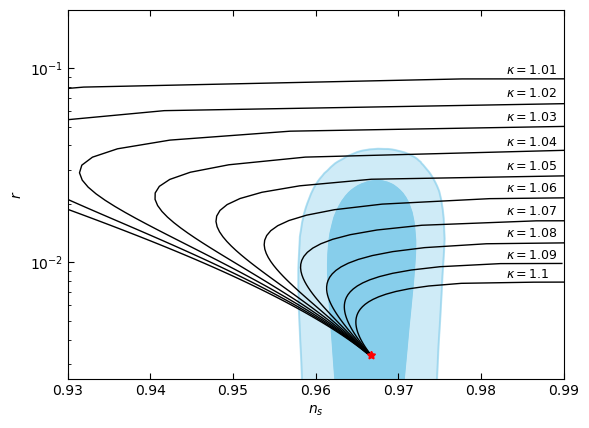

In [16]:
# bicep21s_x_new = [coord[0] for coord in BK141s]
# bicep21s_y_new = [coord[1] for coord in BK141s]

# bicep22s_x_new = [coord[0] for coord in BK142s]
# bicep22s_y_new = [coord[1] for coord in BK142s]

bck1s=np.loadtxt("bck1s.txt",float)
bck2s=np.loadtxt("bck2s.txt",float)
bck1s_n_s,bck1s_r=bck1s[:,0],bck1s[:,1]
bck2s_n_s,bck2s_r=bck2s[:,0],bck2s[:,1]

N=60
n_s_univ=1-2/N
r_univ=12/N/N


plt.plot(bck1s_n_s,bck1s_r, color="skyblue", alpha=1)
plt.fill_between(bck1s_n_s,bck1s_r, color="skyblue", alpha=1)
plt.plot(bck2s_n_s,bck2s_r, color="skyblue", alpha=0.5)
plt.fill_between(bck2s_n_s,bck2s_r, color="skyblue", alpha=0.4)
plt.yscale("log")
plt.xlim(0.93,0.99)
plt.ylim(0.0025,0.2)
plt.xlabel("$n_s$")
plt.ylabel("$r$")
plt.plot(n_s_plot_1_01,r_plot_1_01,label="$\kappa$=1.01",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_02,r_plot_1_02,label="$\kappa$=1.02",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_03[4:],r_plot_1_03[4:],label="$\kappa$=1.03",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_04[7:],r_plot_1_04[7:],label="$\kappa$=1.04",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_05[10:],r_plot_1_05[10:],label="$\kappa$=1.05",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_06[13:],r_plot_1_06[13:],label="$\kappa$=1.06",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_07[15:],r_plot_1_07[15:],label="$\kappa$=1.07",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_08[15:],r_plot_1_08[15:],label="$\kappa$=1.08",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_09[27:],r_plot_1_09[27:],label="$\kappa$=1.09",c='k',linewidth=1.0)
plt.plot(n_s_plot_1_1_plot,r_plot_1_1_plot,label="$\kappa$=1.1",c='k',linewidth=1.0)
plt.plot(n_s_univ,r_univ,marker=(5, 1),c='r')
# plt.legend()
plt.text(0.983, 0.0083, '$\kappa = 1.1$', fontsize = 9)
plt.text(0.983, 0.0105, '$\kappa = 1.09$', fontsize = 9)
plt.text(0.983, 0.0135, '$\kappa = 1.08$', fontsize = 9)
plt.text(0.983, 0.0175, '$\kappa = 1.07$', fontsize = 9)
plt.text(0.983, 0.023, '$\kappa = 1.06$', fontsize = 9)
plt.text(0.983, 0.03, '$\kappa = 1.05$', fontsize = 9)
plt.text(0.983, 0.04, '$\kappa = 1.04$', fontsize = 9)
plt.text(0.983, 0.0535, '$\kappa = 1.03$', fontsize = 9)
plt.text(0.983, 0.071, '$\kappa = 1.02$', fontsize = 9)
plt.text(0.983, 0.094, '$\kappa = 1.01$', fontsize = 9)
plt.tick_params(axis='y', which='both', direction='in', length=2)
plt.tick_params(axis='both', direction='in', length=4)
plt.tick_params(bottom=True,top=True)
plt.savefig('all.pdf', bbox_inches='tight')
plt.show()

In [ ]:
bck1s=np.loadtxt("bck1s.txt",float)
bck2s=np.loadtxt("bck2s.txt",float)
bck1s_n_s,bck1s_r=bck1s[:,0],bck1s[:,1]
bck2s_n_s,bck2s_r=bck2s[:,0],bck2s[:,1]

N=60
n_s_univ=1-2/N
r_univ=12/N/N
plt.plot(n_s_univ,r_univ,marker=(5, 1),c='r')


plt.plot(bck1s_n_s,bck1s_r, color="skyblue", alpha=1)
plt.fill_between(bck1s_n_s,bck1s_r, color="skyblue", alpha=1)
plt.plot(bck2s_n_s,bck2s_r, color="skyblue", alpha=0.5)
plt.fill_between(bck2s_n_s,bck2s_r, color="skyblue", alpha=0.4)
plt.yscale("log")
plt.xlim(0.93,0.99)
plt.ylim(0.0025,0.2)
plt.xlabel("$n_s$")
plt.ylabel("$r$")
plt.tick_params(axis='y', which='both', direction='in', length=2)
plt.tick_params(axis='both', direction='in', length=4)
plt.tick_params(bottom=True,top=True)
plt.show()